**Context:**

- Name of the my dataset is MetroPT-3. It stimulates autonomous transport systems with sensor signals. Anomalies in such autonous sytems such as abnormal notor singals and navigations errors lead to disruptions of production flows.
- MetroPT-3 contains time-series sensor data simulating mobile transport systems which are suitable for anomaly detection related to machinery or robotic agents in a factory setting

**Challenge of the dataset:**
- Sensor readings are noisy and can vary under normal conditions
- Anomalous events are rare and often unlabelled
- Requires robust, unsupervised models to detect subtle faults

**Significance of identifying these errors:**
Timely identification of errors in autonomous vehicles reduces downtime, prevents accidents, and improves operational efficiency

------------------------------------------------------------------------------------

### 1. Clear Goal:

Your goal is anomaly detection in advanced manufacturing based on compressor sensor data.

You want to detect early faults, abnormal behavior, or risks without labeled anomalies (so it’s unsupervised or semi-supervised).



# Data Loading

**Import Library**

In [4]:
# import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Load dataset**

In [5]:
# Load the dataset
file_path = 'MetroPT3_AirCompressor.csv'  
df = pd.read_csv(file_path)

In [6]:
list(df.columns)

['Unnamed: 0',
 'timestamp',
 'TP2',
 'TP3',
 'H1',
 'DV_pressure',
 'Reservoirs',
 'Oil_temperature',
 'Motor_current',
 'COMP',
 'DV_eletric',
 'Towers',
 'MPG',
 'LPS',
 'Pressure_switch',
 'Oil_level',
 'Caudal_impulses']

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**First & Last 5 rows**

In [7]:
# Basic exploration
print("=== Dataset Overview ===")
print(f"Shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())
print("\nLast 5 rows:")
print(df.tail())

=== Dataset Overview ===
Shape: (1516948, 17)

First 5 rows:
   Unnamed: 0            timestamp    TP2    TP3     H1  DV_pressure  \
0           0  2020-02-01 00:00:00 -0.012  9.358  9.340       -0.024   
1          10  2020-02-01 00:00:10 -0.014  9.348  9.332       -0.022   
2          20  2020-02-01 00:00:19 -0.012  9.338  9.322       -0.022   
3          30  2020-02-01 00:00:29 -0.012  9.328  9.312       -0.022   
4          40  2020-02-01 00:00:39 -0.012  9.318  9.302       -0.022   

   Reservoirs  Oil_temperature  Motor_current  COMP  DV_eletric  Towers  MPG  \
0       9.358           53.600         0.0400   1.0         0.0     1.0  1.0   
1       9.348           53.675         0.0400   1.0         0.0     1.0  1.0   
2       9.338           53.600         0.0425   1.0         0.0     1.0  1.0   
3       9.328           53.425         0.0400   1.0         0.0     1.0  1.0   
4       9.318           53.475         0.0400   1.0         0.0     1.0  1.0   

   LPS  Pressure_switch  

# Data Exploration

**Data types and missing values**

In [8]:
# Data types and missing values
print("\n=== Data Types ===")
print(df.dtypes)
print("\n=== Missing Values ===")
print(df.isnull().sum())


=== Data Types ===
Unnamed: 0           int64
timestamp           object
TP2                float64
TP3                float64
H1                 float64
DV_pressure        float64
Reservoirs         float64
Oil_temperature    float64
Motor_current      float64
COMP               float64
DV_eletric         float64
Towers             float64
MPG                float64
LPS                float64
Pressure_switch    float64
Oil_level          float64
Caudal_impulses    float64
dtype: object

=== Missing Values ===
Unnamed: 0         0
timestamp          0
TP2                0
TP3                0
H1                 0
DV_pressure        0
Reservoirs         0
Oil_temperature    0
Motor_current      0
COMP               0
DV_eletric         0
Towers             0
MPG                0
LPS                0
Pressure_switch    0
Oil_level          0
Caudal_impulses    0
dtype: int64


In [9]:
# Summary statistics
print("\n=== Summary Statistics ===")
print(df.describe())


=== Summary Statistics ===
         Unnamed: 0           TP2           TP3            H1   DV_pressure  \
count  1.516948e+06  1.516948e+06  1.516948e+06  1.516948e+06  1.516948e+06   
mean   7.584735e+06  1.367826e+00  8.984611e+00  7.568155e+00  5.595619e-02   
std    4.379053e+06  3.250930e+00  6.390951e-01  3.333200e+00  3.824015e-01   
min    0.000000e+00 -3.200000e-02  7.300000e-01 -3.600000e-02 -3.200000e-02   
25%    3.792368e+06 -1.400000e-02  8.492000e+00  8.254000e+00 -2.200000e-02   
50%    7.584735e+06 -1.200000e-02  8.960000e+00  8.784000e+00 -2.000000e-02   
75%    1.137710e+07 -1.000000e-02  9.492000e+00  9.374000e+00 -1.800000e-02   
max    1.516947e+07  1.067600e+01  1.030200e+01  1.028800e+01  9.844000e+00   

         Reservoirs  Oil_temperature  Motor_current          COMP  \
count  1.516948e+06     1.516948e+06   1.516948e+06  1.516948e+06   
mean   8.985233e+00     6.264418e+01   2.050171e+00  8.369568e-01   
std    6.383070e-01     6.516261e+00   2.302053e+00  

**Dataset Size:**
- There are approximately 1.52 million rows of data (1.516948e+06)
- All columns have the same number of entries, indicating no missing values


**Key Variables and Their Characteristics:**


a) Pressure-related measurements:
- DV_pressure: Mean pressure is 0.056 (std: 0.382)
- TP2: Mean value of 1.37 (std: 3.25)
- TP3: Mean value of 8.98 (std: 0.64)
- H1: Mean value of 7.57 (std: 3.33)


b) Temperature and Current:
- Oil_temperature: Average temperature is 62.64°C (std: 6.52°C)
- Motor_current: Mean current is 2.05 (std: 2.30)


c) Binary/Categorical Indicators (values between 0 and 1):
- COMP: Mean 0.84 (mostly 1s, some 0s)
- DV_eletric: Mean 0.16 (mostly 0s, some 1s)
- Towers: Mean 0.92 (mostly 1s)
- MPG: Mean 0.83 (mostly 1s)
- LPS: Mean 0.003 (mostly 0s)
- Pressure_switch: Mean 0.99 (almost all 1s)
- Oil_level: Mean 0.90 (mostly 1s)
- Caudal_impulses: Mean 0.94 (mostly 1s)


**Notable Patterns:**
- Many of the binary indicators (Towers, MPG, Pressure_switch, etc.) are predominantly in the "on" state (1)
- The oil temperature shows a wide range from 15.4°C to 89.05°C
- Motor current has a large standard deviation (2.30) relative to its mean (2.05), suggesting significant variation
- The pressure measurements (TP2, TP3, H1) show different scales and variations

**Potential Areas of Interest:**
- The large standard deviation in motor current might indicate varying load conditions
- The wide range in oil temperature might be worth investigating for potential operational issues
- The binary indicators show different patterns of operation, with some being almost always on (Pressure_switch) while others show more variation (DV_eletric)

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**Duplicated Rows**

In [10]:
# Check for duplicates
print("\n=== Duplicate Rows ===")
print(f"Number of duplicates: {df.duplicated().sum()}")


=== Duplicate Rows ===
Number of duplicates: 0


**Time Series Plot of TP2 and TP3 Pressure Sensors**

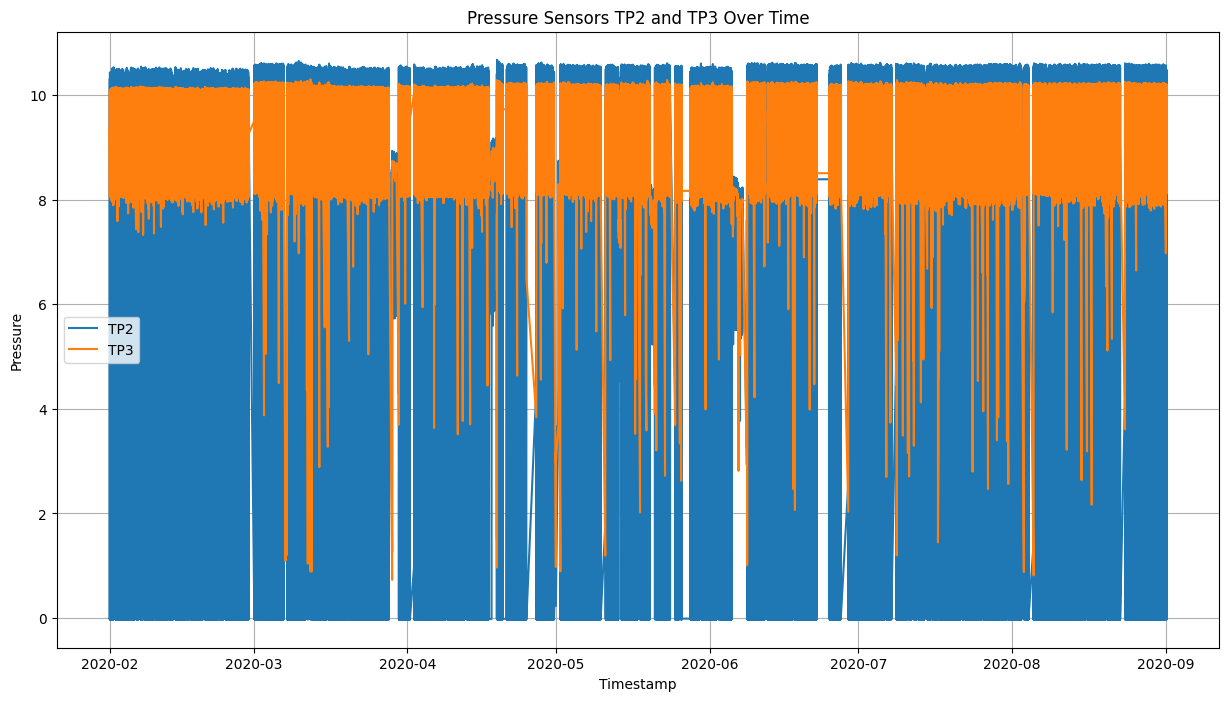

In [11]:
# Plot time series
if 'timestamp' in df.columns:
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    plt.figure(figsize=(15, 8))
    plt.plot(df['timestamp'], df['TP2'], label='TP2')
    plt.plot(df['timestamp'], df['TP3'], label='TP3')
    plt.title('Pressure Sensors TP2 and TP3 Over Time')
    plt.xlabel('Timestamp')
    plt.ylabel('Pressure')
    plt.legend()
    plt.grid()
    plt.show()

This plot shows me;
- sharp drops: indicating a fault, shutdown or anomaly
- flat sections: stable period showing normal operations
- missing gaps: machines was off or no sensor readings

**hourly_pressure_plot_TP2_TP3**

<Figure size 1500x800 with 0 Axes>

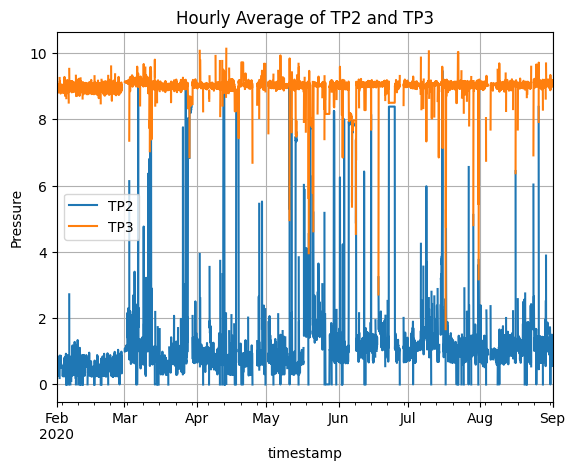

In [12]:
# Resample by hour and plot mean values
hourly = df.set_index('timestamp').resample('H').mean()
plt.figure(figsize=(15, 8))
hourly[['TP2', 'TP3']].plot()
plt.title('Hourly Average of TP2 and TP3')
plt.ylabel('Pressure')
plt.grid()
plt.show()


**TP2 (Blue Line):**
- The values of TP2 are generally much lower than TP3, mostly staying below 2, with occasional spikes up to 6 or higher.

- There is significant variability and frequent fluctuations, indicating that TP2 is a more dynamic or sensitive measurement.

**TP3 (Orange Line):**
- TP3 values are consistently high, mostly between 8 and 10, with occasional drops.

- The line is much more stable, with only brief dips, suggesting that TP3 is usually maintained at a high value, possibly as a setpoint or controlled pressure.

**Comparing TP2 & TP3:**
- The two variables behave very differently: TP3 is stable and high, while TP2 is low and variable.

- The stability of TP3 suggests it could be a reference or output pressure, while TP2 might be an input, return, or a pressure in a more variable part of the system.

- Periods where both lines show more activity (e.g., more spikes or drops) could indicate times of operational changes, disturbances, or issues.

-------------

**Correlation Matrix - All columns**


💥 Highly Correlated Feature Pairs (|corr| > 0.8):
TP3         Reservoirs    0.999993
COMP        MPG           0.984555
H1          COMP          0.971419
            MPG           0.954307
TP2         DV_eletric    0.947396
            MPG          -0.941250
            COMP         -0.955521
H1          DV_eletric   -0.958663
COMP        DV_eletric   -0.959307
TP2         H1           -0.961269
DV_eletric  MPG          -0.975641
dtype: float64

🌸 Least Correlated Feature Pairs (|corr| < 0.1):
MPG              Caudal_impulses    0.094497
Reservoirs       MPG                0.089555
TP3              MPG                0.088343
Towers           Caudal_impulses    0.087214
Oil_level        Caudal_impulses    0.070259
Reservoirs       Towers             0.065729
TP3              Towers             0.064937
H1               Pressure_switch    0.064769
DV_pressure      Oil_level          0.058520
TP2              LPS                0.057651
Towers           Oil_level          0.056029
Unna

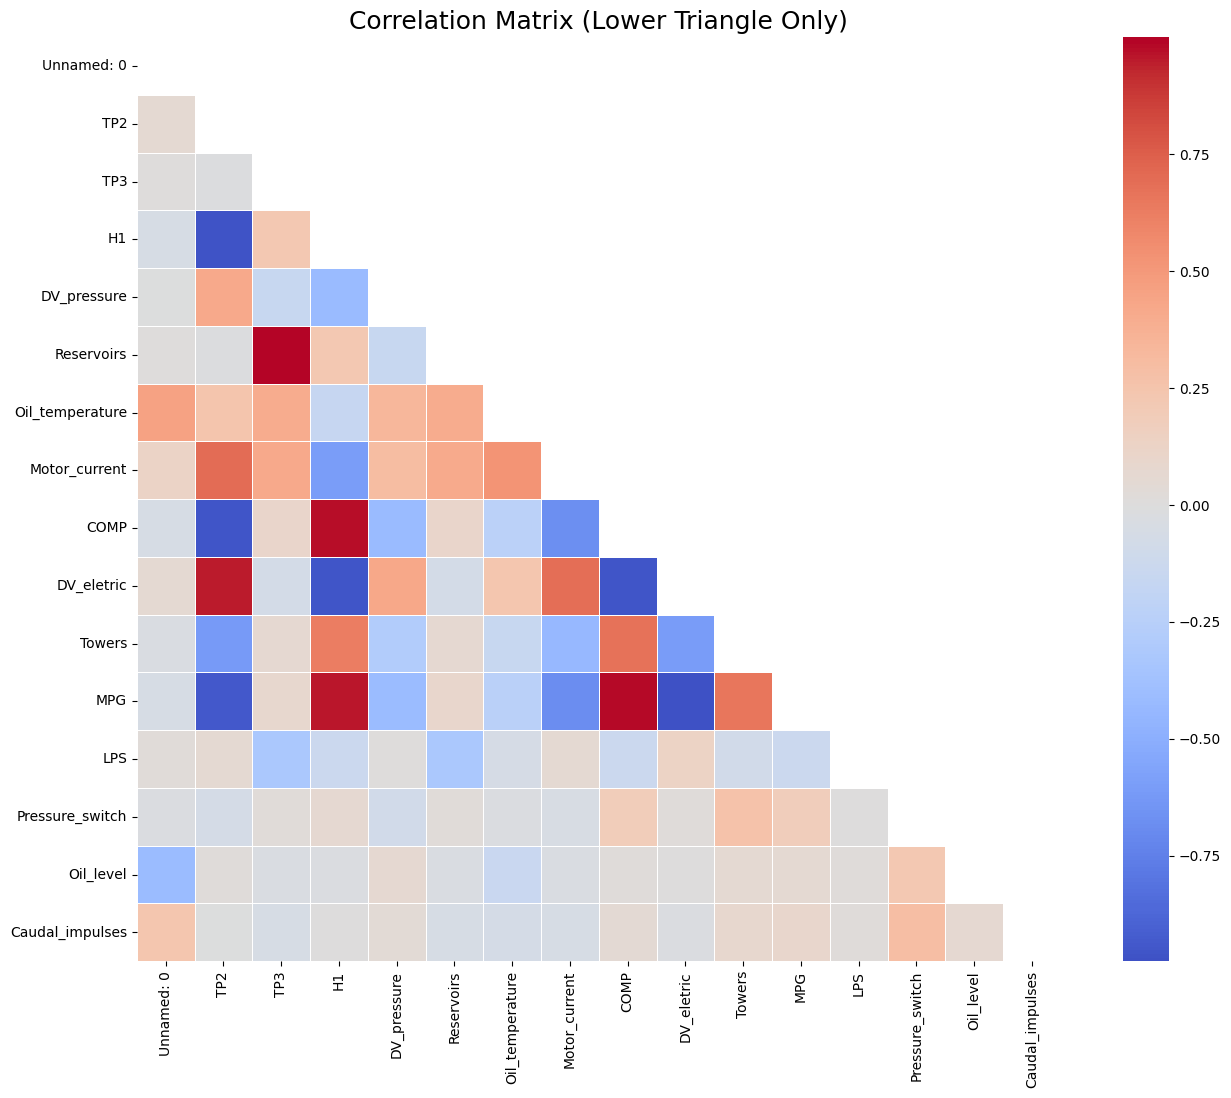

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the full correlation matrix
corr_matrix = df.select_dtypes(include=[np.number]).corr()

# UNSTACK and SORT correlation pairs
corr_pairs = corr_matrix.unstack()
# Remove self-correlations
corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]
# Drop duplicate pairs
corr_pairs = corr_pairs.drop_duplicates()

# Sort pairs by correlation value
sorted_corr_pairs = corr_pairs.sort_values(ascending=False)

# print Highly Correlated Pairs
high_corr = sorted_corr_pairs[abs(sorted_corr_pairs) > 0.8]
print("\n💥 Highly Correlated Feature Pairs (|corr| > 0.8):")
print(high_corr)

# print Least Correlated Pairs
low_corr = sorted_corr_pairs[abs(sorted_corr_pairs) < 0.1]
print("\n🌸 Least Correlated Feature Pairs (|corr| < 0.1):")
print(low_corr)

# clean Heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=False, fmt='.2f', center=0, square=True, linewidths=.5)
plt.title('Correlation Matrix (Lower Triangle Only)', fontsize=18)
plt.show()


This plot helps you:
- Understand relationships between sensors
- Detect multicollinearity
- Guide feature selection or dimensionality reduction

Some pairs are very similar. Meaning they are highly redundant. This can lead to confusion for ML Models during training.

Some pairs are diverse. We should keep these features as they help the models during training to capture different aspects of the data.

In [14]:
print(df.columns)

Index(['Unnamed: 0', 'timestamp', 'TP2', 'TP3', 'H1', 'DV_pressure',
       'Reservoirs', 'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric',
       'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level',
       'Caudal_impulses'],
      dtype='object')


-------------

**Distribution Plots of Key Variables with Log-Scaled Y-Axis**

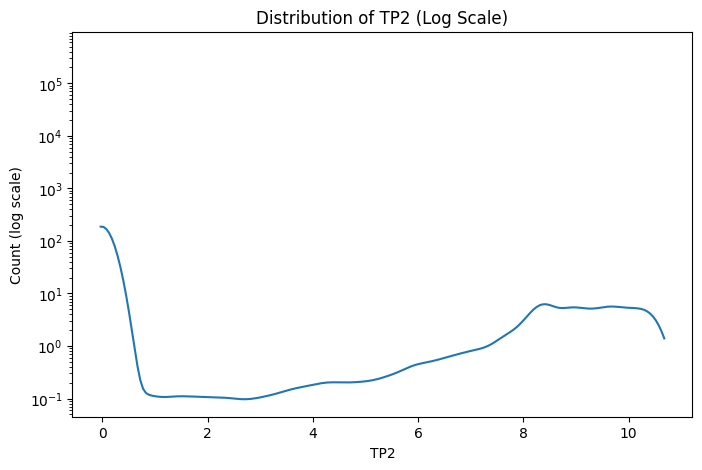

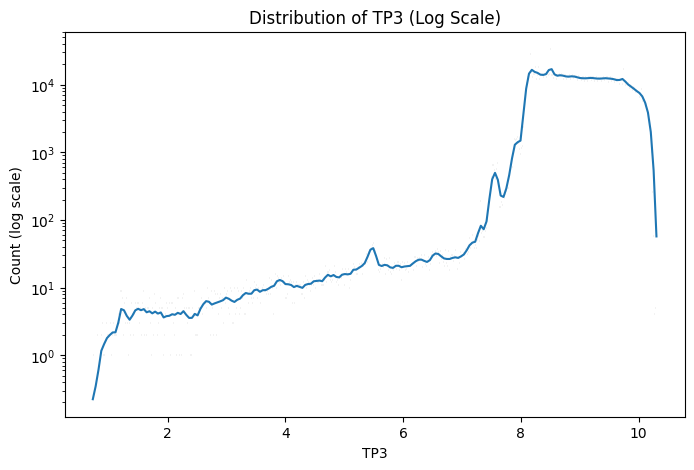

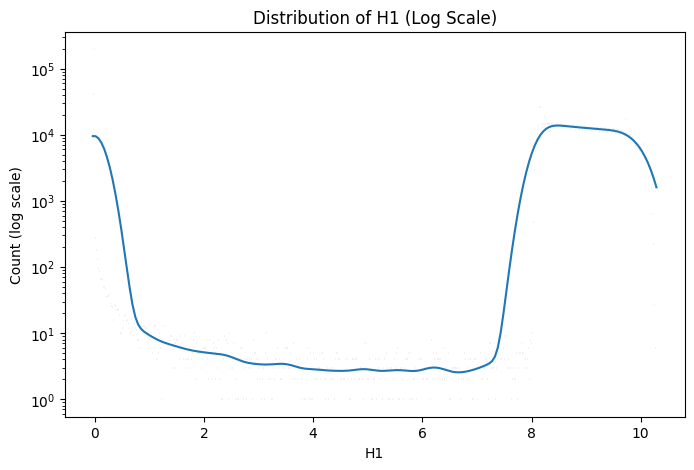

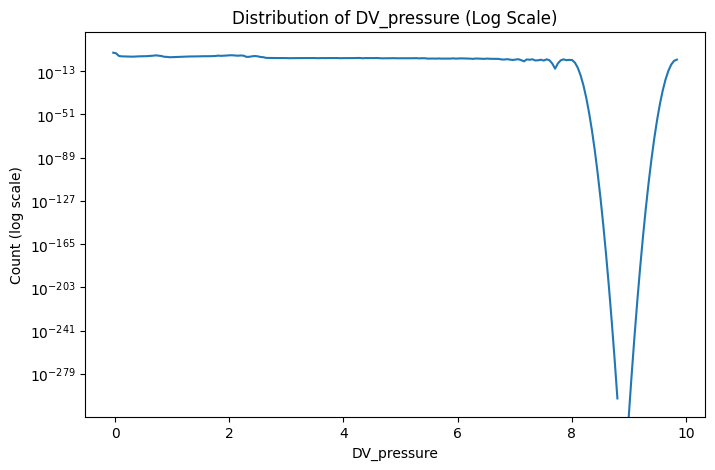

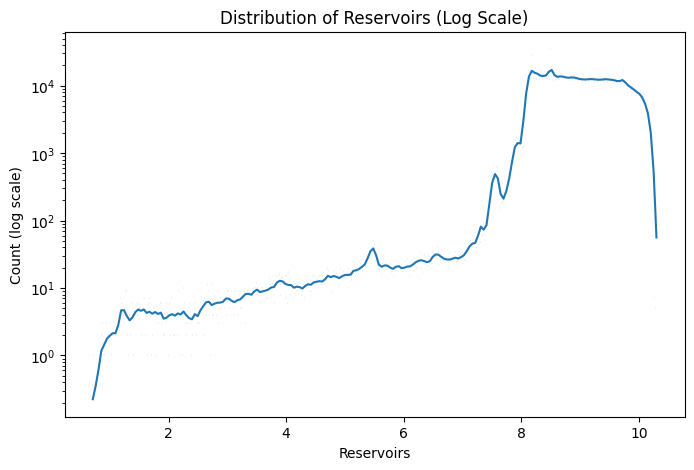

In [15]:
# Distribution plots for key variables

import matplotlib.pyplot as plt
import seaborn as sns

key_vars = ['TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs']

for var in key_vars:
    if var in df.columns:
        plt.figure(figsize=(8, 5))
        
        # Use log scale for y-axis
        sns.histplot(df[var], kde=True, log_scale=(False, True)) 
        
        plt.title(f'Distribution of {var} (Log Scale)')
        plt.ylabel('Count (log scale)')
        plt.show()

TP2 Distribution: 
- From the graph, it seems like the machine is either ON or OFF - the values are heavily concentrated at 2 ends
- Preprocessing actions on TP2 have been completed earlier

TP3 Distribution:
- The graph shows it is operating at high pressure (around 8-9), long tail towards lower values.
- Preprocessing actions on TP2 have been completed earlier

H1 Distribution:
- The graph has many values that are clustered around 0 and around 8-10.
- For data pre-processing:
      - Binarize to a 0/1 flag

DV_pressure Distribution:
- The graph looks strange, very flat distribution. Almost constant.
- It might not be informative.
- For data_preprocessing:
      - Drop it if it has near-zero variance

Reservoirs Distribution:
- The graph looks highly skewed -> most values are high (8-9)
- It could be a tank filling/emptying state
- For data-preprocessing:
      - Apply log transformation as it would make it would help to improve performance for some ML Models
      - OR binarize - create flags like reservoir_high, reservoir_low

**The reason why I used a log-scaled y-axis:**

The data had a large range of frequencies.

Using a log-scaled y-axis helped me to:

- Visualize common and rare values clearly.
- Avoided imbalance of higher-frequency bins that can hide smaller trends.
- Handle & visualise skewed data more effectively.

In [16]:
print(df.columns)

Index(['Unnamed: 0', 'timestamp', 'TP2', 'TP3', 'H1', 'DV_pressure',
       'Reservoirs', 'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric',
       'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level',
       'Caudal_impulses'],
      dtype='object')


------------------------------------------------------------------------------------------

In [17]:
# import sys
# !{sys.executable} -m pip install scikit-learn

**Identify outliers -> Check this**

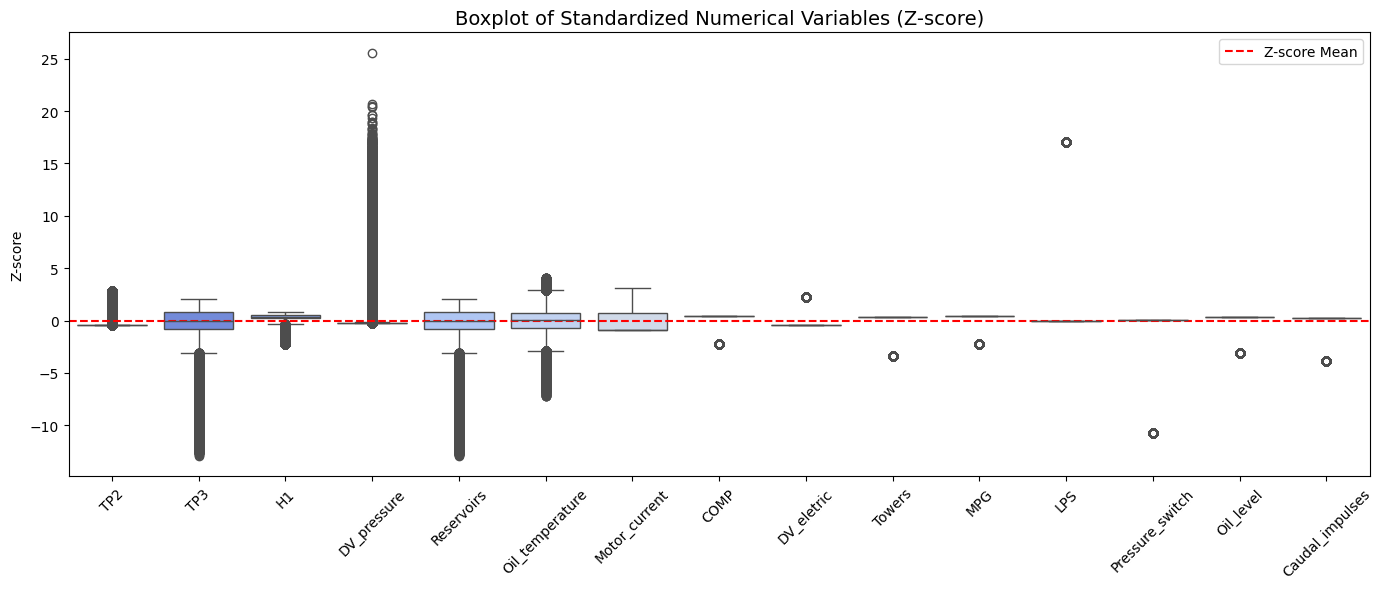

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Drop irrelevant or index-like columns
df = df.drop(columns=['Unnamed: 0'], errors='ignore')

# Standardize all numeric features
numeric_cols = df.select_dtypes(include='number').columns
scaled_df = pd.DataFrame(
    StandardScaler().fit_transform(df[numeric_cols]),
    columns=numeric_cols
)

# Plot standardized boxplot with annotations and log-scale option
plt.figure(figsize=(14, 6))
sns.boxplot(data=scaled_df, palette="coolwarm")

# enhancements
plt.axhline(0, color='red', linestyle='--', label='Z-score Mean')
plt.title('Boxplot of Standardized Numerical Variables (Z-score)', fontsize=14)
plt.ylabel('Z-score')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [19]:
print(df.columns)

Index(['timestamp', 'TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs',
       'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric', 'Towers',
       'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses'],
      dtype='object')


In [20]:
print(df.columns)

Index(['timestamp', 'TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs',
       'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric', 'Towers',
       'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses'],
      dtype='object')


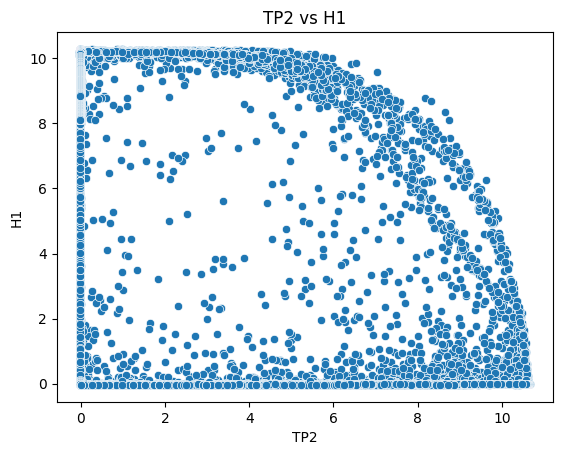

In [21]:
# Scatter plot of highly correlated variables
sns.scatterplot(x='TP2', y='H1', data=df)
plt.title('TP2 vs H1')
plt.show()


The scatter plot:
- confirms the linear/non-linear nature of the correlation seen in the heatmap
- identifies clusters, outliers or anomalies in the joint distribution
- useful for validating sensor behaviour

**📊 Distribution Analysis - Oil Temp**

In [22]:
import sys
!{sys.executable} -m pip install statsmodels

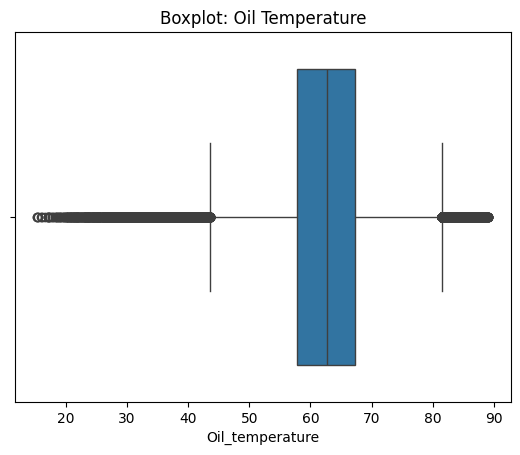

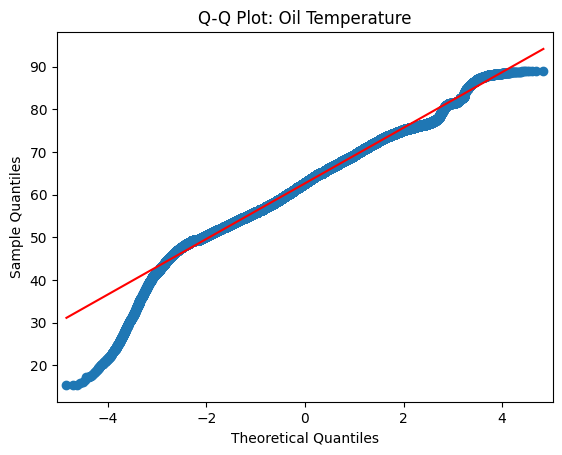

In [23]:
from statsmodels.graphics.gofplots import qqplot
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot
sns.boxplot(x=df['Oil_temperature'])
plt.title("Boxplot: Oil Temperature")
plt.show()

# Q-Q Plot
qqplot(df['Oil_temperature'], line='s')
plt.title("Q-Q Plot: Oil Temperature")
plt.show()


Boxplot:
- shows the spread, median & potential outliers in the column "Oil_temperature"
- it clearly shows outliers - values far away from the middle(median)
- helps identify skewness and extreme values visually

Q-Q Plot (Quantile-Quantile):
- This plot tests if Oil_Temperature follows a normal distribution (Gaussian). If the points fall on the red line, that is normal data points. Here, you see heavy tails(deviations) -> which means not perfectly normal

For data pre-processing, I could;
- Handle outliers:
      - Cap extreme values (winsorization)
      - Use robust scaling (RobustScaler) instead of StandardScaler
- Normalize Data:
      - Apply log transform OR Box-Cox transform to make it more normal -> if required by the model
      - OR you can just use models that don't assume normality

In [24]:
# Skewness and kurtosis for all numerical columns
for col in df.select_dtypes(include='number').columns:
    skew = df[col].skew()
    kurt = df[col].kurt()
    print(f"{col}: Skewness = {skew:.2f}, Kurtosis = {kurt:.2f}")
    

TP2: Skewness = 1.99, Kurtosis = 2.06
TP3: Skewness = -0.88, Kurtosis = 7.40
H1: Skewness = -1.76, Kurtosis = 1.30
DV_pressure: Skewness = 5.72, Kurtosis = 38.71
Reservoirs: Skewness = -0.89, Kurtosis = 7.48
Oil_temperature: Skewness = -0.05, Kurtosis = -0.06
Motor_current: Skewness = 0.45, Kurtosis = -1.45
COMP: Skewness = -1.82, Kurtosis = 1.33
DV_eletric: Skewness = 1.85, Kurtosis = 1.42
Towers: Skewness = -3.09, Kurtosis = 7.56
MPG: Skewness = -1.78, Kurtosis = 1.18
LPS: Skewness = 17.01, Kurtosis = 287.40
Pressure_switch: Skewness = -10.67, Kurtosis = 111.79
Oil_level: Skewness = -2.75, Kurtosis = 5.54
Caudal_impulses: Skewness = -3.60, Kurtosis = 10.97


The skewness and kurtosis plot gives us a numerical summary of how non-normal each variable is.

- helps to decide if data needs transformation 
- supports assumption checks for statistical modelling

--------------

**Oil Level: Boxplot and Distribution Analysis**

In [25]:
print(df['Oil_level'].unique())

[1. 0.]


In [26]:
print(df['Oil_level'].value_counts())

Oil_level
1.0    1371557
0.0     145391
Name: count, dtype: int64


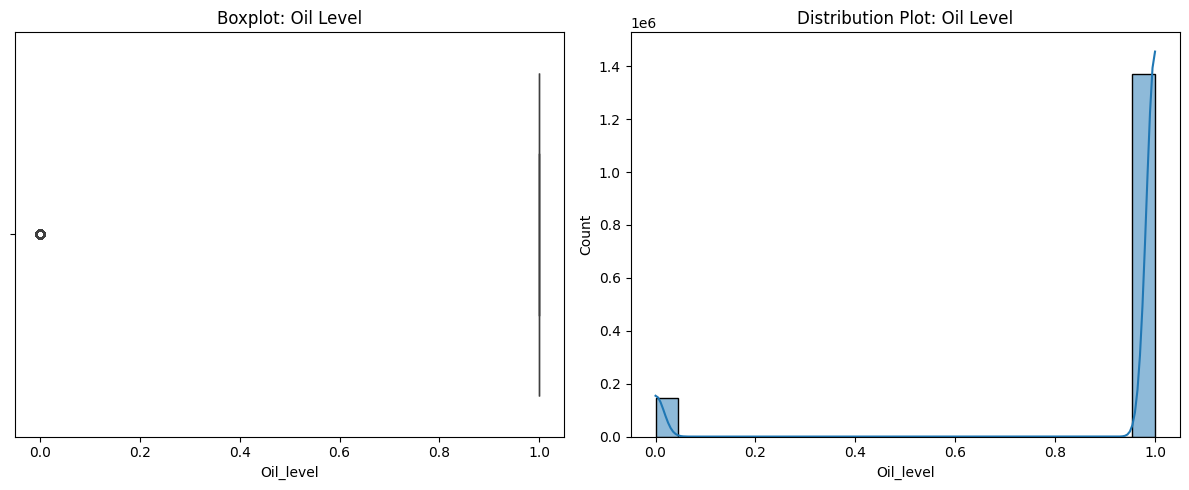

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Oil Level Boxplot and Distribution
plt.figure(figsize=(12, 5))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Oil_level'])
plt.title('Boxplot: Oil Level')

# Distribution Plot(Histogram)
plt.subplot(1, 2, 2)
sns.histplot(df['Oil_level'], kde=True)
plt.title('Distribution Plot: Oil Level')

plt.tight_layout()
plt.show()


Observation:

Boxplot
- Shows extreme concentration at two points - this supports binary-like behavior (e.g, 0=empty, 1=full)
- The cluster around 1.0 suggests the system is usually topped up

Histogram
- We notice in our histogram a very skewed distribution. 
- There are very few oil level points, but the majority are clustered around 1.0

-----------------

**Pressure Switch: State Frequency Count Plot**

In [28]:
# class distribution
pressure_switch_counts = df['Pressure_switch'].value_counts()

print("Class Distribution:")
print(pressure_switch_counts)

# % distribution
pressure_switch_percent = df['Pressure_switch'].value_counts(normalize=True) * 100

print("\nClass Distribution (Percentage):")
print(pressure_switch_percent)


Class Distribution:
Pressure_switch
1.0    1503958
0.0      12990
Name: count, dtype: int64

Class Distribution (Percentage):
Pressure_switch
1.0    99.143675
0.0     0.856325
Name: proportion, dtype: float64


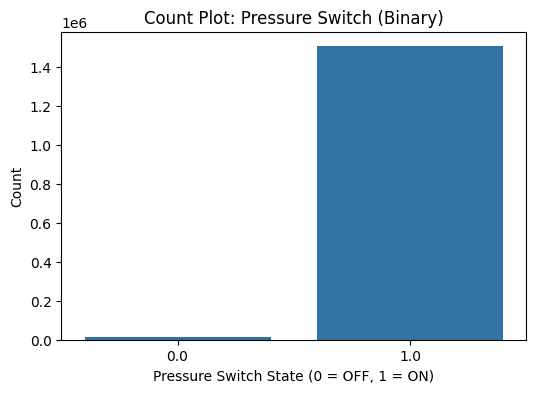

In [29]:
# Pressure Switch Count Plot
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Pressure_switch'])
plt.title('Count Plot: Pressure Switch (Binary)')
plt.xlabel('Pressure Switch State (0 = OFF, 1 = ON)')
plt.ylabel('Count')
plt.show()


Observation: 

The Pressure Switch feature is binary (0 = OFF, 1 = ON).

Severe class imbalance:

Class 1 (ON) dominates — almost all values are 1.

Class 0 (OFF) is extremely rare

--------------------

**LPS: Pressure Sensor Distribution (Log-Scaled)**

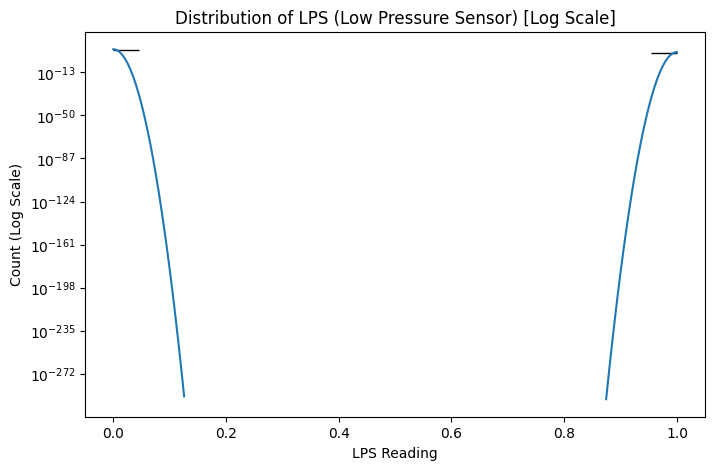

In [30]:
# LPS Sensor Distribution Plot with Log Scale
plt.figure(figsize=(8, 5))
sns.histplot(df['LPS'], kde=True, log_scale=(False, True))
plt.title('Distribution of LPS (Low Pressure Sensor) [Log Scale]')
plt.xlabel('LPS Reading')
plt.ylabel('Count (Log Scale)')
plt.show()

Observation:
LPS (Low Pressure Sensor) readings seem to be heavily bimodal:

- Many points close to 0.

- Many points close to 1.

Almost nothing in-between → this hints binary-like behavior or two very dominant states.

The plot being log-scaled shows:

- Most counts are highly skewed to 0 and 1.

- Could be saturated sensor readings (ON/OFF behavior).

-----------

**Towers: Normality Assessment via Q-Q Plot**

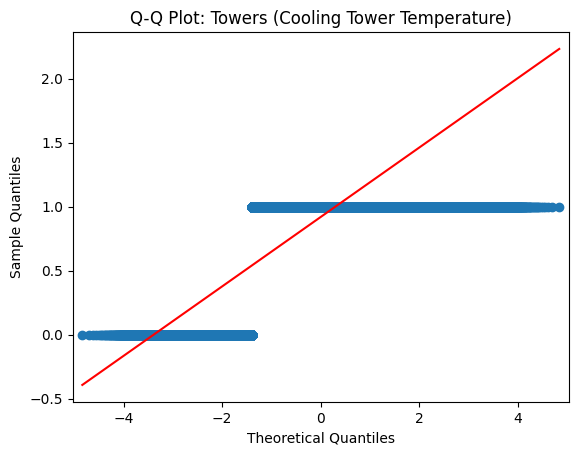

In [31]:
from statsmodels.graphics.gofplots import qqplot

# Towers Q-Q Plot
qqplot(df['Towers'], line='s')
plt.title('Q-Q Plot: Towers (Cooling Tower Temperature)')
plt.show()


Observation:

Q-Q plot:
- shows towers has very low variance & non-normal distribution
- data is mostly two distinct values
- this suggests that Towers is likely binary OR near-constant

------------

**Motor Current: Time Series Stability Analysis**

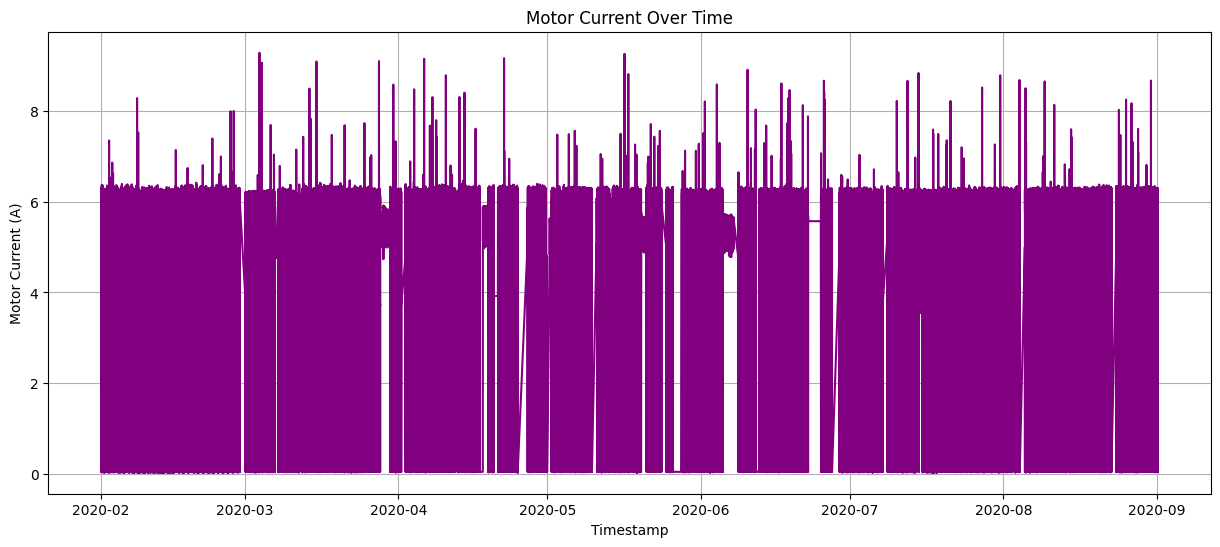

In [32]:
# Motor Current Time Series Plot
plt.figure(figsize=(15, 6))
plt.plot(df['timestamp'], df['Motor_current'], color='purple')
plt.title('Motor Current Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Motor Current (A)')
plt.grid()
plt.show()


Observation:
- Motor_current shows frequent drops to near zero. where there were sudden OFF states or inactivity
- Normal operation is around 6A but there are lots of spikes and sharp drop
- High variability suggests operational instability, potential anomalies, or shutdown events

------------

**Stationary Check (Time-Series Focus)**

In [33]:
from statsmodels.tsa.stattools import adfuller

# Clean NaNs
tp2_clean = df['TP2'].dropna()

# Subsample if data is very large
if len(tp2_clean) > 50000: 
    tp2_sampled = tp2_clean.sample(10000, random_state=42)
else:
    tp2_sampled = tp2_clean

# ADF Test with controlled max lag
try:
    result = adfuller(tp2_sampled, maxlag=50)
    print(f"✅ ADF Statistic: {result[0]}")
    print(f"✅ p-value: {result[1]}")
except Exception as e:
    print(f"⚠️ ADF Test Failed: {e}")


✅ ADF Statistic: -26.093515609741306
✅ p-value: 0.0


**Autocorrelation (ACF/PACF plots)**

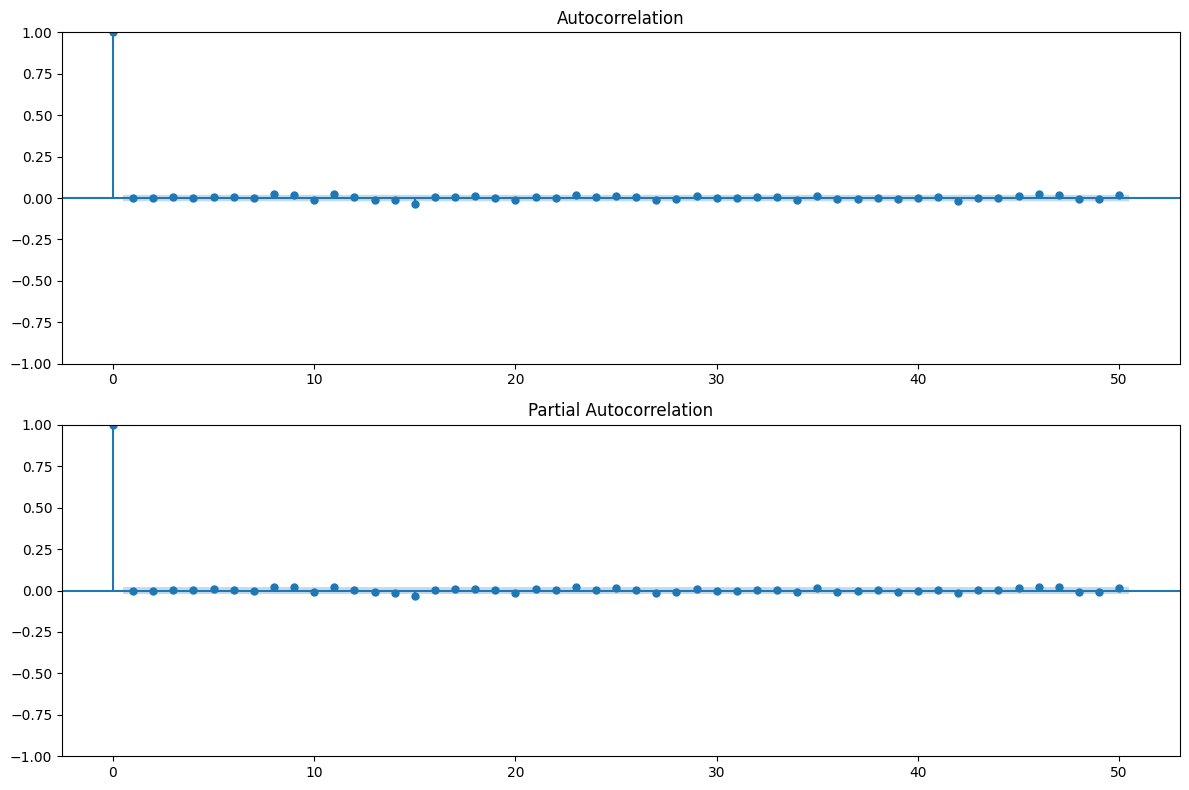

In [34]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

tp2_clean = df['TP2'].dropna()

if len(tp2_clean) > 50000:
    tp2_sampled = tp2_clean.sample(10000, random_state=42)
else:
    tp2_sampled = tp2_clean

# Plot ACF and PACF
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

plot_acf(tp2_sampled, lags=50, ax=ax[0])
plot_pacf(tp2_sampled, lags=50, ax=ax[1])

plt.tight_layout()
plt.show()


**Seasonality/Trend Decomposition (STL)**

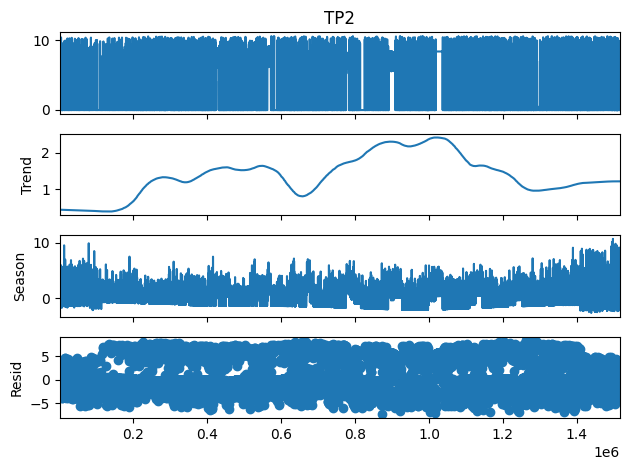

In [35]:
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt

tp2_clean = df['TP2'].dropna()

if len(tp2_clean) > 50000:
    tp2_sampled = tp2_clean.sample(20000, random_state=42).sort_index()
else:
    tp2_sampled = tp2_clean

# STL Decomposition
stl = STL(tp2_sampled, period=1440)
result = stl.fit()

# Plot
result.plot()
plt.show()


**Multivariate Outlier Detection (Mahalanobis Distance)**

In [36]:
from sklearn.covariance import EmpiricalCovariance

# Select features
selected_cols = ['TP2', 'TP3', 'Motor_current']  

# Fit empirical covariance
cov = EmpiricalCovariance().fit(df[selected_cols])

# Calculate mahalanobis distance
df['mahalanobis'] = cov.mahalanobis(df[selected_cols])


**Clustering (DBSCAN) for Anomaly Detection**

In [37]:
from sklearn.cluster import DBSCAN

df_sampled = df[['TP2', 'TP3']].sample(5000, random_state=42)

db = DBSCAN(eps=0.5, min_samples=5).fit(df_sampled)
df_sampled['cluster'] = db.labels_

# Data Preprocessing

### Basic Cleaning

**Drop Unnecessary Columns**

In [38]:
# Drop 'Unnamed: 0' column
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)


- Removes indexing artifact often introduced during CSV export.
- Prevents unnecessary noise from non-informative ID columns.

**Convert Timestamp**

In [39]:
# 'timestamp' column to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])


- Enables time-based operations like sorting, rolling windows, and anomaly detection.
- Crucial for extracting temporal features (e.g., hour, weekday).

**Sort Data**

In [40]:
# sort dataframe by timestamp and reset index
df.sort_values(by='timestamp', inplace=True)
df.reset_index(drop=True, inplace=True)

**Check for Missing Values**

In [41]:
print(df.isnull().sum())

timestamp          0
TP2                0
TP3                0
H1                 0
DV_pressure        0
Reservoirs         0
Oil_temperature    0
Motor_current      0
COMP               0
DV_eletric         0
Towers             0
MPG                0
LPS                0
Pressure_switch    0
Oil_level          0
Caudal_impulses    0
mahalanobis        0
dtype: int64


In [42]:
df.head()

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,mahalanobis
0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,2.525655
1,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,2.474035
2,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,2.421102
3,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,2.377785
4,2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,2.329993


**Feature Engineering and Missing Data Handling (TP2 & TP3)**

In [43]:
# Convert 'timestamp' to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

# differences between timestamps
time_deltas = df.index.to_series().diff().dropna()

# statistics
print(time_deltas.value_counts().head(10))  
print(time_deltas.describe()) 


timestamp
0 days 00:00:10    1337521
0 days 00:00:09     128277
0 days 00:00:12      38321
0 days 00:00:13       7988
0 days 00:00:11       4471
0 days 00:00:21         10
0 days 00:00:19          5
0 days 00:00:22          4
0 days 00:00:14          3
0 days 00:00:17          3
Name: count, dtype: int64
count                      1516947
mean     0 days 00:00:12.141221809
std      0 days 00:05:14.107266185
min                0 days 00:00:08
25%                0 days 00:00:10
50%                0 days 00:00:10
75%                0 days 00:00:10
max                2 days 00:01:58
Name: timestamp, dtype: object


- Uncovers irregular time gaps and helps validate sensor sampling rates.
- Useful for frequency alignment and gap-filling decisions.

In [44]:
# Generate Difference Features
df['TP2_diff'] = df['TP2'].diff()
df['TP3_diff'] = df['TP3'].diff()

# Rolling standard deviation
df['TP2_roll_std'] = df['TP2'].rolling(window=50).std()
df['TP3_roll_std'] = df['TP3'].rolling(window=50).std()

# Handle missing timestamps
missing_times = df.index.to_series().diff().max()
print(missing_times)

# fill gaps
df = df.asfreq('10S') 
df = df.ffill()


2 days 00:01:58


- Captures short-term volatility and system dynamics.
- Supports anomaly detection and state change modeling.


- Enforces consistent sampling interval.
- Preserves continuity for models sensitive to regular sequences.

**Drop Highly Correlated Features**

In [45]:
import numpy as np
import pandas as pd

# correlation threshold
correlation_threshold = 0.9

# correlation matrix
corr_matrix = df.select_dtypes(include=[np.number]).corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Finding features with correlation greater than threshold
to_drop = [column for column in upper.columns if any(upper[column] > correlation_threshold)]

print(f"🗑️ Dropping {len(to_drop)} highly correlated features:")
print(to_drop)

# Drop features
df_reduced = df.drop(columns=to_drop)

# new shape
print(f"✅ New shape of dataset: {df_reduced.shape}")


🗑️ Dropping 5 highly correlated features:
['H1', 'Reservoirs', 'COMP', 'DV_eletric', 'MPG']
✅ New shape of dataset: (1841760, 15)


- Reduces redundancy and multicollinearity.
- Improves model generalization and efficiency.

In [46]:
print(f"\n🗑️ Dropping {len(to_drop)} highly correlated features:")
for feature in to_drop:
    print(f" - {feature}")



🗑️ Dropping 5 highly correlated features:
 - H1
 - Reservoirs
 - COMP
 - DV_eletric
 - MPG


### 📝 Why These Features Were Dropped:

I dropped `H1`, `Reservoirs`, `COMP`, `DV_eletric`, and `MPG` because they showed extremely high correlations (|corr| > 0.8) with other features. Retaining highly correlated variables can introduce redundancy and multicollinearity, negatively impacting the model's performance. Removing them simplifies the dataset and reduces overfitting risk.


------------------

**Variance Check and Drop Low-Variance Feature (DV_Feature)**

In [47]:
# standard deviation of DV_pressure
dv_pressure_std = df['DV_pressure'].std()

# Drop if variance is very low
if dv_pressure_std < 0.001:
    df = df.drop(columns=['DV_pressure'])
    print("Dropped 'DV_pressure' due to low variance.")
else:
    print(f"'DV_pressure' standard deviation is {dv_pressure_std:.6f}, not dropping.")

'DV_pressure' standard deviation is 0.377563, not dropping.


- Removes features with negligible information content.
- Tailors feature space to active signals only.

**Min-Max Scaling(DV_Pressure)**

In [48]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['DV_pressure_scaled'] = scaler.fit_transform(df[['DV_pressure']])

- Normalizes features for algorithms sensitive to scale.
- Particularly useful for distance-based models.

----------------

**Outlier Treatment(Winsorization) - Oil_temp**

In [49]:
from scipy.stats.mstats import winsorize

# limit extreme values
df['Oil_temperature_winsorized'] = winsorize(df['Oil_temperature'], limits=[0.01, 0.01]) 


- Mitigates outlier influence without full removal.
- Stabilizes variance and improves downstream robustness.

**Normalization (Log Transformation) - Oil_temp**

In [50]:
import numpy as np

# Log transformation
if (df['Oil_temperature_winsorized'] > 0).all():
    df['Oil_temperature_log'] = np.log(df['Oil_temperature_winsorized'])
else:
    df['Oil_temperature_log'] = np.log1p(df['Oil_temperature_winsorized'])


- Reduces skewness in long-tailed features.
- Improves symmetry for modeling assumptions.

------------------

**Outlier Flag - Oil_level**

In [51]:
df['oil_low_flag'] = (df['Oil_level'] < 0.2).astype(int)

- Encodes domain-specific risk conditions.
- Aids interpretable rule-based anomaly detection.

**Outlier Flag - Oil_level**

In [52]:
print(df['Oil_level'].unique())

[1. 0.]


------------

**Handling Class Imbalance in Pressure Switch**

In [53]:
# checking class distribution
counts = df['Pressure_switch'].value_counts()

# If imbalance is extreme, feature is dropped
if counts.min() / counts.sum() < 0.01: 
    print("Severe imbalance detected. Dropping 'Pressure_switch' feature.")
    df = df.drop(columns=['Pressure_switch'])
else:
    print("Moderate balance. Keeping 'Pressure_switch'.")


Severe imbalance detected. Dropping 'Pressure_switch' feature.


If a binary column has almost all 1s (ON) and very few 0s (OFF):

- It carries very little information.

- Model can be biased or ignore the minority class.

Dropping it in that case will remove noise and unnecessary bias.

- Avoids misleading learning from severely imbalanced classes.
- Prevents noise from minority labels.

In [54]:
# # Apply simple smoothing (optional, not common for binary)
# df['Pressure_switch'] = df['Pressure_switch'].astype('category')

-------------------

**Check Unique Values LPS & Binarize**

In [55]:
# Check unique values
print(df['LPS'].value_counts())

# binarize
df['LPS_binary'] = (df['LPS'] > 0.5).astype(int)


LPS
0.0    1826729
1.0      15031
Name: count, dtype: int64


- Converts continuous signal into actionable state flags.
- Useful for classification or rule-based logic.

**Robust Scaling - LPS**

In [56]:
from sklearn.preprocessing import RobustScaler

# RobustScaler handles outliers better
scaler = RobustScaler()
df['LPS_scaled'] = scaler.fit_transform(df[['LPS']])


- Robust to outliers, more reliable than MinMax in noisy contexts.
- Tailored to datasets with sensor spikes or drift.

------------------

**Check Unique Values & Range - Towers**

In [57]:
print(df['Towers'].value_counts())

print(df['Towers'].describe())

Towers
1.0    1684536
0.0     157224
Name: count, dtype: int64
count    1.841760e+06
mean     9.146338e-01
std      2.794259e-01
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: Towers, dtype: float64


In [58]:
df.head()

,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,...,TP2_diff,TP3_diff,TP2_roll_std,TP3_roll_std,DV_pressure_scaled,Oil_temperature_winsorized,Oil_temperature_log,oil_low_flag,LPS_binary,LPS_scaled
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.04,1.0,0.0,1.0,...,NaN,NaN,NaN,NaN,0.001202,53.600,3.981549,0,0,0.0
2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.04,1.0,0.0,1.0,...,-0.002,-0.01,NaN,NaN,0.001502,53.675,3.982947,0,0,0.0
2020-02-01 00:00:20,-0.014,9.348,9.332,-0.022,9.348,53.675,0.04,1.0,0.0,1.0,...,-0.002,-0.01,NaN,NaN,0.001502,53.675,3.982947,0,0,0.0
2020-02-01 00:00:30,-0.014,9.348,9.332,-0.022,9.348,53.675,0.04,1.0,0.0,1.0,...,-0.002,-0.01,NaN,NaN,0.001502,53.675,3.982947,0,0,0.0
2020-02-01 00:00:40,-0.014,9.348,9.332,-0.022,9.348,53.675,0.04,1.0,0.0,1.0,...,-0.002,-0.01,NaN,NaN,0.001502,53.675,3.982947,0,0,0.0


**Low Variance Feature Detection: Towers**

In [59]:
# Calculate variance
towers_variance = df['Towers'].var()
print(f"Variance of Towers: {towers_variance}")

# dropping features with variance very low
if towers_variance < 0.01:
    print("Towers feature has very low variance — consider dropping.")
    df = df.drop(columns=['Towers'])
else:
    print("Towers feature retained.")


Variance of Towers: 0.07807883064719559
Towers feature retained.


- Ensures all retained features offer some variability.
- Clean signal isolation.

---------------

**Motor Current - Status and Variability Indicators**

In [60]:
df['motor_inactive'] = (df['Motor_current'] < 0.5).astype(int)
df['motor_rolling_mean'] = df['Motor_current'].rolling(window=3600, min_periods=1).mean()
df['motor_rolling_std'] = df['Motor_current'].rolling(window=3600, min_periods=1).std()
df['motor_spike'] = (df['Motor_current'].diff().abs() > 2).astype(int)

- Targets motor behavior and abnormalities.
- Enhances diagnostic and failure-mode relevance.

---------------

In [61]:
df.head()

,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,...,DV_pressure_scaled,Oil_temperature_winsorized,Oil_temperature_log,oil_low_flag,LPS_binary,LPS_scaled,motor_inactive,motor_rolling_mean,motor_rolling_std,motor_spike
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.04,1.0,0.0,1.0,...,0.001202,53.600,3.981549,0,0,0.0,1,0.04,NaN,0
2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.04,1.0,0.0,1.0,...,0.001502,53.675,3.982947,0,0,0.0,1,0.04,0.0,0
2020-02-01 00:00:20,-0.014,9.348,9.332,-0.022,9.348,53.675,0.04,1.0,0.0,1.0,...,0.001502,53.675,3.982947,0,0,0.0,1,0.04,0.0,0
2020-02-01 00:00:30,-0.014,9.348,9.332,-0.022,9.348,53.675,0.04,1.0,0.0,1.0,...,0.001502,53.675,3.982947,0,0,0.0,1,0.04,0.0,0
2020-02-01 00:00:40,-0.014,9.348,9.332,-0.022,9.348,53.675,0.04,1.0,0.0,1.0,...,0.001502,53.675,3.982947,0,0,0.0,1,0.04,0.0,0


### Feature Engineering

**Statistical Anomaly Detection**

In [62]:
from scipy.stats import zscore

col = 'Motor_current'

# Z-score based anomaly
df['z_score'] = zscore(df[col])
df['anomaly_z'] = (abs(df['z_score']) > 3).astype(int)

# IQR-based anomaly
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['anomaly_iqr'] = ((df[col] < lower_bound) | (df[col] > upper_bound)).astype(int)

# Rolling window anomaly detection
window_size = 50
df['rolling_mean'] = df[col].rolling(window=window_size).mean()
df['rolling_std'] = df[col].rolling(window=window_size).std()
df['anomaly_roll'] = (abs(df[col] - df['rolling_mean']) > 3 * df['rolling_std']).astype(int)


- Multi-perspective anomaly detection enhances reliability.
- Tailored for detecting transient and sustained deviations.

In [63]:
list(df.columns)

['TP2',
 'TP3',
 'H1',
 'DV_pressure',
 'Reservoirs',
 'Oil_temperature',
 'Motor_current',
 'COMP',
 'DV_eletric',
 'Towers',
 'MPG',
 'LPS',
 'Oil_level',
 'Caudal_impulses',
 'mahalanobis',
 'TP2_diff',
 'TP3_diff',
 'TP2_roll_std',
 'TP3_roll_std',
 'DV_pressure_scaled',
 'Oil_temperature_winsorized',
 'Oil_temperature_log',
 'oil_low_flag',
 'LPS_binary',
 'LPS_scaled',
 'motor_inactive',
 'motor_rolling_mean',
 'motor_rolling_std',
 'motor_spike',
 'z_score',
 'anomaly_z',
 'anomaly_iqr',
 'rolling_mean',
 'rolling_std',
 'anomaly_roll']

In [64]:
df.head()

,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,...,motor_inactive,motor_rolling_mean,motor_rolling_std,motor_spike,z_score,anomaly_z,anomaly_iqr,rolling_mean,rolling_std,anomaly_roll
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.04,1.0,0.0,1.0,...,1,0.04,NaN,0,-0.862843,0,0,NaN,NaN,0
2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.04,1.0,0.0,1.0,...,1,0.04,0.0,0,-0.862843,0,0,NaN,NaN,0
2020-02-01 00:00:20,-0.014,9.348,9.332,-0.022,9.348,53.675,0.04,1.0,0.0,1.0,...,1,0.04,0.0,0,-0.862843,0,0,NaN,NaN,0
2020-02-01 00:00:30,-0.014,9.348,9.332,-0.022,9.348,53.675,0.04,1.0,0.0,1.0,...,1,0.04,0.0,0,-0.862843,0,0,NaN,NaN,0
2020-02-01 00:00:40,-0.014,9.348,9.332,-0.022,9.348,53.675,0.04,1.0,0.0,1.0,...,1,0.04,0.0,0,-0.862843,0,0,NaN,NaN,0


In [65]:
print(df.columns)

Index(['TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 'Oil_temperature',
       'Motor_current', 'COMP', 'DV_eletric', 'Towers', 'MPG', 'LPS',
       'Oil_level', 'Caudal_impulses', 'mahalanobis', 'TP2_diff', 'TP3_diff',
       'TP2_roll_std', 'TP3_roll_std', 'DV_pressure_scaled',
       'Oil_temperature_winsorized', 'Oil_temperature_log', 'oil_low_flag',
       'LPS_binary', 'LPS_scaled', 'motor_inactive', 'motor_rolling_mean',
       'motor_rolling_std', 'motor_spike', 'z_score', 'anomaly_z',
       'anomaly_iqr', 'rolling_mean', 'rolling_std', 'anomaly_roll'],
      dtype='object')


---------------

**Temporal Features**

In [66]:
df = df.reset_index()
df['timestamp'] = pd.to_datetime(df['timestamp']) 
df.set_index('timestamp', inplace=True)
df = df.sort_index()

In [67]:
# Create temporal features
df['hour'] = df.index.hour
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)

- Captures temporal cycles, usage patterns, and seasonality.
- Supports context-aware modeling.

Getting Timestamp from index to column

In [68]:
df = df.reset_index()

print(df.columns)

Index(['timestamp', 'TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs',
       'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric', 'Towers',
       'MPG', 'LPS', 'Oil_level', 'Caudal_impulses', 'mahalanobis', 'TP2_diff',
       'TP3_diff', 'TP2_roll_std', 'TP3_roll_std', 'DV_pressure_scaled',
       'Oil_temperature_winsorized', 'Oil_temperature_log', 'oil_low_flag',
       'LPS_binary', 'LPS_scaled', 'motor_inactive', 'motor_rolling_mean',
       'motor_rolling_std', 'motor_spike', 'z_score', 'anomaly_z',
       'anomaly_iqr', 'rolling_mean', 'rolling_std', 'anomaly_roll', 'hour',
       'day_of_week', 'month', 'is_weekend'],
      dtype='object')


**Rolling Statistics**

In [69]:
# Rolling mean and std 
numeric_cols = ['TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 'Oil_temperature', 'Motor_current']

for col in numeric_cols:
    df[f'{col}_roll_mean_60'] = df[col].rolling(window=60, min_periods=1).mean()
    df[f'{col}_roll_std_60'] = df[col].rolling(window=60, min_periods=1).std()


- Captures trends and fluctuations over a consistent horizon.
- Vital for pattern recognition in dynamic systems.

**Lag Features**

In [70]:
# Build lagged features
lagged_features = []

for col in numeric_cols:
    for lag in [1, 2, 3]:
        lagged = df[col].shift(lag)
        lagged.name = f'{col}_lag_{lag}'
        lagged_features.append(lagged)

# Combine lagged features
lagged_df = pd.concat(lagged_features, axis=1)
df = pd.concat([df, lagged_df], axis=1)


- Injects memory of recent states into the feature space.
- Crucial for time-dependent model architectures.

In [71]:
# De-fragment df
df = df.copy()

- Highlights relational dynamics between signals.
- Useful for detecting inconsistencies or deviations.

**Interaction Features**

In [72]:
from itertools import combinations

# Select key columns for pairwise differences
important_cols = ['TP2', 'TP3', 'H1', 'Reservoirs']

pairwise_diff_features = []
for col1, col2 in combinations(important_cols, 2):
    diff = df[col1] - df[col2]
    diff.name = f'{col1}_minus_{col2}'
    pairwise_diff_features.append(diff)

pairwise_diff_df = pd.concat(pairwise_diff_features, axis=1)
df = pd.concat([df, pairwise_diff_df], axis=1)


- Highlights relational dynamics between signals.
- Useful for detecting inconsistencies or deviations.

Handle NaNs

In [73]:
# NaNs will be introduced at the edges 
# drop NaNs
df = df.dropna().copy()


**🕒 Time Series Analysis Enhancements**

In [74]:
# # Convert timestamp to datetime and set as index
# df['timestamp'] = pd.to_datetime(df['timestamp']) 
# df.set_index('timestamp', inplace=True)
# df = df.sort_index()


In [75]:
# # Time-based aggregations
# df_hourly = df.resample('H').mean()
# df_daily = df.resample('D').mean()
# df_weekly = df.resample('W').mean()


In [76]:
list(df.columns)

['timestamp',
 'TP2',
 'TP3',
 'H1',
 'DV_pressure',
 'Reservoirs',
 'Oil_temperature',
 'Motor_current',
 'COMP',
 'DV_eletric',
 'Towers',
 'MPG',
 'LPS',
 'Oil_level',
 'Caudal_impulses',
 'mahalanobis',
 'TP2_diff',
 'TP3_diff',
 'TP2_roll_std',
 'TP3_roll_std',
 'DV_pressure_scaled',
 'Oil_temperature_winsorized',
 'Oil_temperature_log',
 'oil_low_flag',
 'LPS_binary',
 'LPS_scaled',
 'motor_inactive',
 'motor_rolling_mean',
 'motor_rolling_std',
 'motor_spike',
 'z_score',
 'anomaly_z',
 'anomaly_iqr',
 'rolling_mean',
 'rolling_std',
 'anomaly_roll',
 'hour',
 'day_of_week',
 'month',
 'is_weekend',
 'TP2_roll_mean_60',
 'TP2_roll_std_60',
 'TP3_roll_mean_60',
 'TP3_roll_std_60',
 'H1_roll_mean_60',
 'H1_roll_std_60',
 'DV_pressure_roll_mean_60',
 'DV_pressure_roll_std_60',
 'Reservoirs_roll_mean_60',
 'Reservoirs_roll_std_60',
 'Oil_temperature_roll_mean_60',
 'Oil_temperature_roll_std_60',
 'Motor_current_roll_mean_60',
 'Motor_current_roll_std_60',
 'TP2_lag_1',
 'TP2_lag_2',

Summarise and analyze data different time grandulities

- reduce noise in higer frequency sensor data
- reveals trend or seasonality that may not be visible at raw (1Hz) resolution
- improve anomaly detection by observing deviations from typical behavior at broader time scales

<Axes: title={'center': 'Motor Current with Rolling Mean'}>

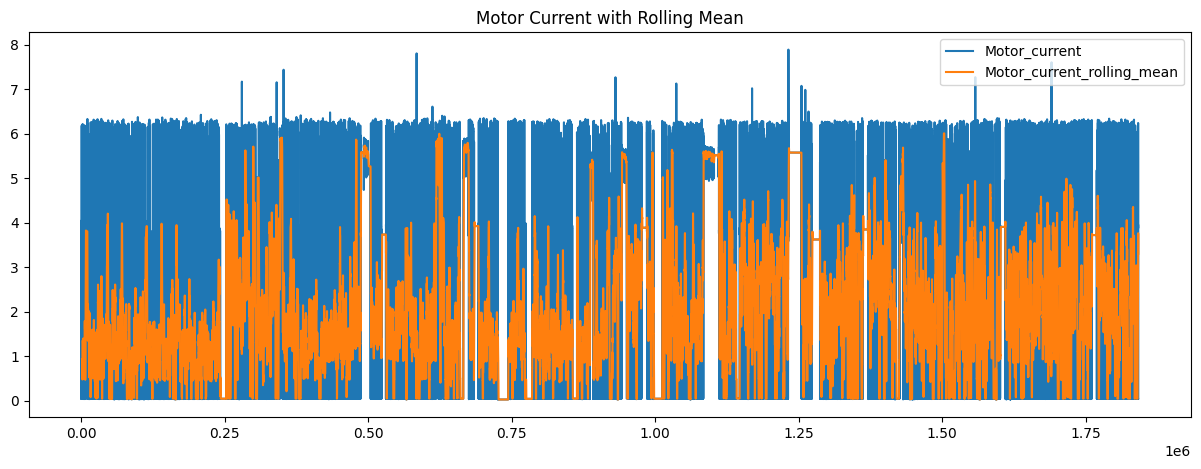

In [77]:
# Rolling statistics
df['Motor_current_rolling_mean'] = df['Motor_current'].rolling(window=1000).mean()
df['Motor_current_rolling_std'] = df['Motor_current'].rolling(window=1000).std()

# Plot
df[['Motor_current', 'Motor_current_rolling_mean']].plot(figsize=(15,5), title='Motor Current with Rolling Mean')


Computes the moving mean and standard deviation over a window of 1000 samples for the Motor_current signal

The purpose is to:
- Smoothen short-term fluctuations
- Detect gradual drifts or anomalies in sensor behavior over time
- Provide dynamic baselines for comparison, helping identify deviations that might indicate faults

The plot shows us how motor_current behaves relative to its moving average, which is crucial for time-series anomaly detection

------------------------------

Keep this for plotting

DO NOT use in model training

-----------------

The following code:

    - Captures usage intensity and state change volatility.

    - Aids fault prediction and behavioral clustering.

**TP2 Feature Engineering**

In [78]:
df['tp2_active'] = (df['TP2'] > 1.0).astype(int)
df['tp2_spike'] = (df['TP2'].diff().abs() > 2).astype(int)

**TP3 Feature Engineering**

In [79]:
df['tp3_on'] = (df['TP3'] >= 7.5).astype(int)
df['tp3_on_rolling_5'] = df['tp3_on'].rolling(window=5, min_periods=1).sum()

In [80]:
list(df.columns)

['timestamp',
 'TP2',
 'TP3',
 'H1',
 'DV_pressure',
 'Reservoirs',
 'Oil_temperature',
 'Motor_current',
 'COMP',
 'DV_eletric',
 'Towers',
 'MPG',
 'LPS',
 'Oil_level',
 'Caudal_impulses',
 'mahalanobis',
 'TP2_diff',
 'TP3_diff',
 'TP2_roll_std',
 'TP3_roll_std',
 'DV_pressure_scaled',
 'Oil_temperature_winsorized',
 'Oil_temperature_log',
 'oil_low_flag',
 'LPS_binary',
 'LPS_scaled',
 'motor_inactive',
 'motor_rolling_mean',
 'motor_rolling_std',
 'motor_spike',
 'z_score',
 'anomaly_z',
 'anomaly_iqr',
 'rolling_mean',
 'rolling_std',
 'anomaly_roll',
 'hour',
 'day_of_week',
 'month',
 'is_weekend',
 'TP2_roll_mean_60',
 'TP2_roll_std_60',
 'TP3_roll_mean_60',
 'TP3_roll_std_60',
 'H1_roll_mean_60',
 'H1_roll_std_60',
 'DV_pressure_roll_mean_60',
 'DV_pressure_roll_std_60',
 'Reservoirs_roll_mean_60',
 'Reservoirs_roll_std_60',
 'Oil_temperature_roll_mean_60',
 'Oil_temperature_roll_std_60',
 'Motor_current_roll_mean_60',
 'Motor_current_roll_std_60',
 'TP2_lag_1',
 'TP2_lag_2',

**H1 Feature Engineering**

In [81]:
df['h1_state'] = (df['H1'] > 5.0).astype(int)
df['h1_transitions_60'] = df['h1_state'].diff().fillna(0).abs().rolling(window=60, min_periods=1).sum()

----------------

**DV_pressure Feature Engineering**

In [82]:
# Constant signal flag
df['dv_pressure_constant'] = (df['DV_pressure'].rolling(window=60, min_periods=1).std() < 0.001).astype(int)

**Reservoirs Feature Engineering**

In [83]:
df['reservoir_high'] = (df['Reservoirs'] > 7.5).astype(int)
df['reservoir_low'] = (df['Reservoirs'] < 3).astype(int)
df['reservoir_below_rolling'] = (df['Reservoirs'] < 5).astype(int).rolling(window=60, min_periods=1).sum()

- Encodes operational ranges into categorical insights.
- Facilitates threshold-sensitive control logics.

Optionaly, you can work on Standarization (Z-score normalization)

In [84]:
list(df.columns)

['timestamp',
 'TP2',
 'TP3',
 'H1',
 'DV_pressure',
 'Reservoirs',
 'Oil_temperature',
 'Motor_current',
 'COMP',
 'DV_eletric',
 'Towers',
 'MPG',
 'LPS',
 'Oil_level',
 'Caudal_impulses',
 'mahalanobis',
 'TP2_diff',
 'TP3_diff',
 'TP2_roll_std',
 'TP3_roll_std',
 'DV_pressure_scaled',
 'Oil_temperature_winsorized',
 'Oil_temperature_log',
 'oil_low_flag',
 'LPS_binary',
 'LPS_scaled',
 'motor_inactive',
 'motor_rolling_mean',
 'motor_rolling_std',
 'motor_spike',
 'z_score',
 'anomaly_z',
 'anomaly_iqr',
 'rolling_mean',
 'rolling_std',
 'anomaly_roll',
 'hour',
 'day_of_week',
 'month',
 'is_weekend',
 'TP2_roll_mean_60',
 'TP2_roll_std_60',
 'TP3_roll_mean_60',
 'TP3_roll_std_60',
 'H1_roll_mean_60',
 'H1_roll_std_60',
 'DV_pressure_roll_mean_60',
 'DV_pressure_roll_std_60',
 'Reservoirs_roll_mean_60',
 'Reservoirs_roll_std_60',
 'Oil_temperature_roll_mean_60',
 'Oil_temperature_roll_std_60',
 'Motor_current_roll_mean_60',
 'Motor_current_roll_std_60',
 'TP2_lag_1',
 'TP2_lag_2',

In [85]:
df.head()

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,...,tp2_active,tp2_spike,tp3_on,tp3_on_rolling_5,h1_state,h1_transitions_60,dv_pressure_constant,reservoir_high,reservoir_low,reservoir_below_rolling
107,2020-02-01 00:17:50,-0.014,8.328,8.316,-0.024,8.332,50.825,0.04,1.0,0.0,...,0,0,1,1.0,1,0.0,0,1,0,0.0
108,2020-02-01 00:18:00,-0.014,8.322,8.308,-0.024,8.324,50.925,0.04,1.0,0.0,...,0,0,1,2.0,1,0.0,1,1,0,0.0
109,2020-02-01 00:18:10,-0.014,8.314,8.302,-0.022,8.316,50.825,0.04,1.0,0.0,...,0,0,1,3.0,1,0.0,0,1,0,0.0
110,2020-02-01 00:18:20,-0.014,8.304,8.290,-0.022,8.306,50.825,0.04,1.0,0.0,...,0,0,1,4.0,1,0.0,0,1,0,0.0
111,2020-02-01 00:18:30,-0.014,8.296,8.284,-0.022,8.296,50.750,0.04,1.0,0.0,...,0,0,1,5.0,1,0.0,0,1,0,0.0


**Originally Dataset (391 features)**

| Category                    | Features                                                                                                                                          |
|-----------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------|
| **Original Features**           | TP2, TP3, H1, DV_pressure, Reservoirs, Oil_temperature, Motor_current, COMP, DV_eletric, Towers, MPG, LPS, Pressure_switch, Oil_level, Caudal_impulses |
| **Rolling Features (window=60)** | TP2_roll_mean_60, TP2_roll_std_60, TP3_roll_mean_60, TP3_roll_std_60, ..., Caudal_impulses_roll_mean_60, Caudal_impulses_roll_std_60                   |
| **Lagged Features (lag 1-3)**    | TP2_lag_1, TP2_lag_2, TP2_lag_3, TP3_lag_1, TP3_lag_2, TP3_lag_3, ..., Caudal_impulses_lag_1, Caudal_impulses_lag_2, Caudal_impulses_lag_3            |
| **Statistical Features**        | z_score, anomaly_z, anomaly_iqr, rolling_mean, rolling_std, anomaly_roll                                                                          |
| **Time-based Features**         | hour, day_of_week, month, is_weekend                                                                                                              |
| **Rolling Features on Others**  | z_score_roll_mean_60, z_score_roll_std_60, anomaly_z_roll_mean_60, anomaly_z_roll_std_60, ..., is_weekend_roll_mean_60, is_weekend_roll_std_60       |
| **Lagged Statistical & Time**   | z_score_lag_1, z_score_lag_2, z_score_lag_3, ..., is_weekend_lag_1, is_weekend_lag_2, is_weekend_lag_3                                             |
| **Pairwise Differences**        | TP2_minus_TP3, TP2_minus_H1, TP2_minus_DV_pressure, ..., month_minus_is_weekend                                                                   |
| **Domain-specific Features**    | Motor_current_rolling_mean, Motor_current_rolling_std, tp2_active, tp2_bin, tp2_diff, tp2_spike, tp3_on, tp3_rounded, tp3_on_rolling_5,            |
|                             | h1_state, h1_change, h1_transitions_60, dv_pressure_std_60, dv_pressure_constant, reservoir_high, reservoir_low, reservoir_below_threshold,        |
|                             | reservoir_below_rolling                                                                                                                           |


We dropped "too granular", "noisy", "redundant" or "hard-to-use" features.
We kept features that are binary, rolling statistics, or cumulative counts — because they are clean, simple, and better for detecting anomalies.

unsupervised learning, especially anomaly detection, **more features ≠ better**

**Variance Threshold Method**

In [86]:
# Low Variance Feature Removal
from sklearn.feature_selection import VarianceThreshold

# Exclude timestamp
features = df.drop(columns=['timestamp'], errors='ignore').select_dtypes(include='number')

# Apply Variance Threshold
selector_var = VarianceThreshold(threshold=0.01) 
features_reduced_var = selector_var.fit_transform(features)

# Update df with selected features
selected_features_var = features.columns[selector_var.get_support()]
print("✅ Features kept after Variance Threshold:")
print(selected_features_var.tolist())

# Keep only selected features + timestamp
df = df[['timestamp'] + selected_features_var.tolist()]


✅ Features kept after Variance Threshold:
['TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric', 'Towers', 'MPG', 'Oil_level', 'Caudal_impulses', 'mahalanobis', 'TP2_diff', 'TP2_roll_std', 'TP3_roll_std', 'Oil_temperature_winsorized', 'Oil_temperature_log', 'oil_low_flag', 'motor_inactive', 'motor_rolling_mean', 'motor_rolling_std', 'z_score', 'rolling_mean', 'rolling_std', 'anomaly_roll', 'hour', 'day_of_week', 'month', 'is_weekend', 'TP2_roll_mean_60', 'TP2_roll_std_60', 'TP3_roll_mean_60', 'TP3_roll_std_60', 'H1_roll_mean_60', 'H1_roll_std_60', 'DV_pressure_roll_mean_60', 'Reservoirs_roll_mean_60', 'Reservoirs_roll_std_60', 'Oil_temperature_roll_mean_60', 'Oil_temperature_roll_std_60', 'Motor_current_roll_mean_60', 'Motor_current_roll_std_60', 'TP2_lag_1', 'TP2_lag_2', 'TP2_lag_3', 'TP3_lag_1', 'TP3_lag_2', 'TP3_lag_3', 'H1_lag_1', 'H1_lag_2', 'H1_lag_3', 'DV_pressure_lag_1', 'DV_pressure_lag_2', 'DV_pressure_lag_3', 'Reservoirs_l

- Filters features with negligible variance across time.
- Optimizes feature set for predictive value.

**Correlation Threshold Method**


💥 Highly Correlated Feature Pairs (|corr| > 0.9):
Motor_current    z_score                   1.000000
Oil_level        oil_low_flag             -1.000000
TP2_minus_TP3    TP2_minus_Reservoirs      1.000000
TP3_minus_H1     H1_minus_Reservoirs      -1.000000
TP3_roll_std_60  Reservoirs_roll_std_60    0.999995
                                             ...   
TP2              DV_eletric                0.900864
                 H1_lag_2                 -0.900451
TP2_lag_1        H1_lag_3                 -0.900451
Motor_current    rolling_mean              0.900170
z_score          rolling_mean              0.900170
Length: 245, dtype: float64

🚫 Features to drop due to high correlation (> 0.9):
{'DV_pressure_lag_1', 'H1_minus_Reservoirs', 'H1', 'COMP', 'MPG', 'H1_lag_2', 'h1_state', 'TP3_lag_1', 'DV_eletric', 'H1_lag_1', 'TP2_minus_TP3', 'tp3_on_rolling_5', 'z_score', 'Oil_temperature_roll_mean_60', 'Motor_current_roll_std_60', 'DV_pressure_lag_2', 'reservoir_high', 'rolling_mean', 'Oi

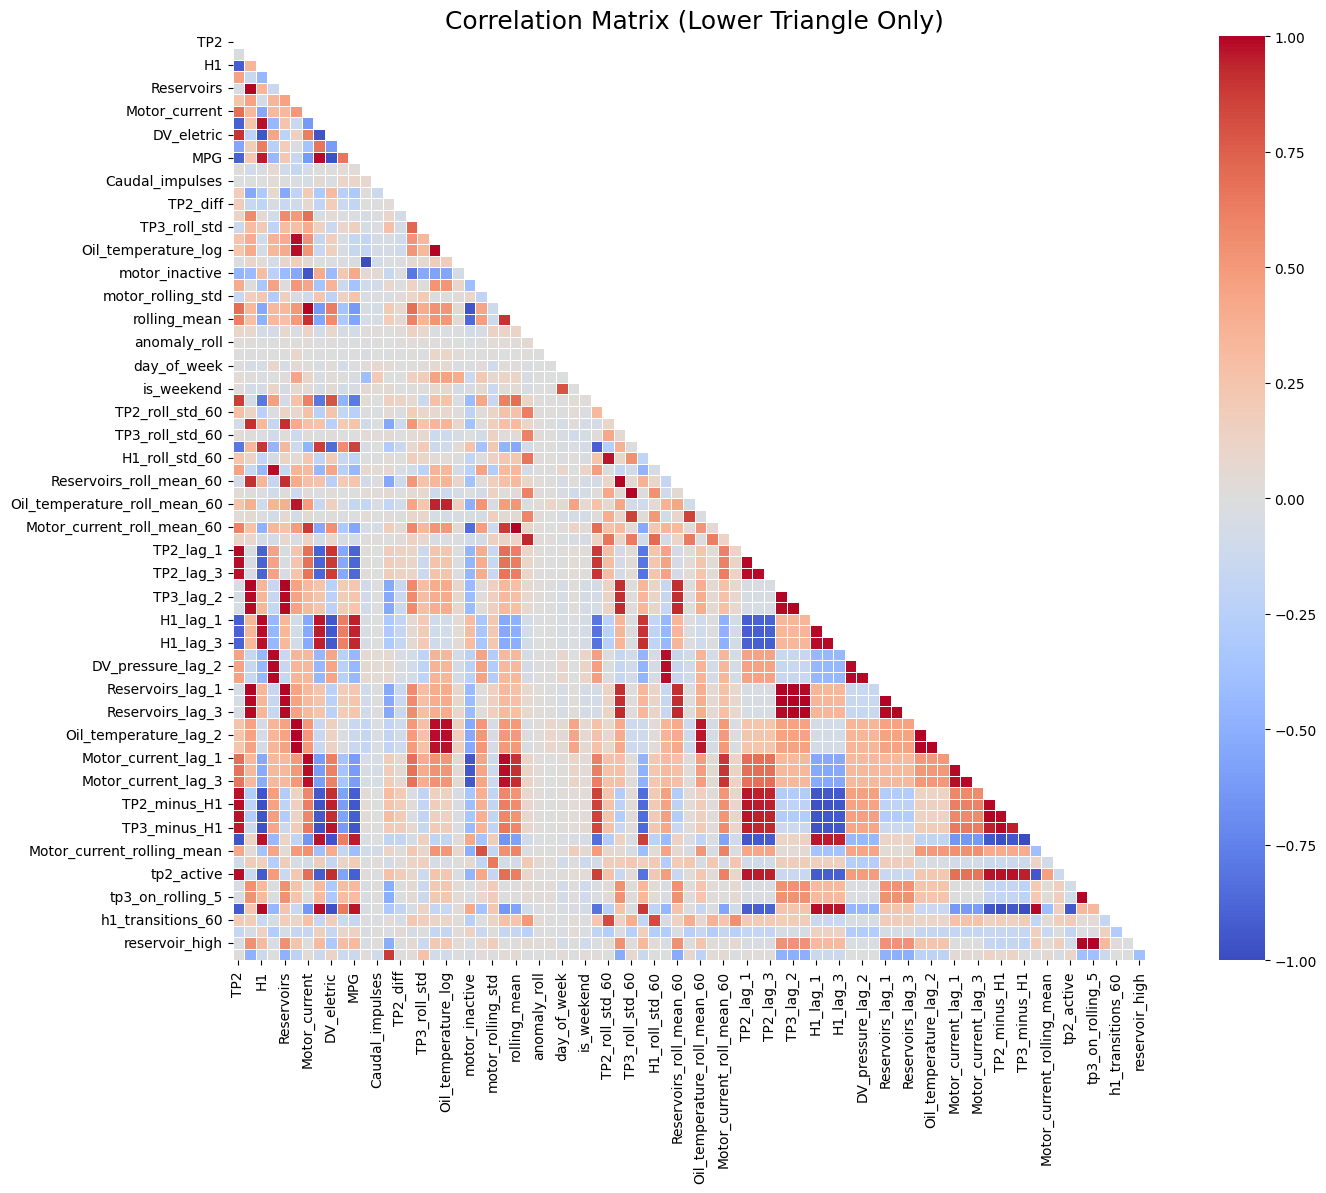

In [87]:
# High Correlation Analysis and Feature Dropping
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# calculate correlation matrix
corr_matrix = df.drop(columns=['timestamp'], errors='ignore').corr()

# unstack and sort correlation pairs
corr_pairs = corr_matrix.unstack()
# Remove self-correlations
corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]
# Drop duplicate pairs
corr_pairs = corr_pairs.drop_duplicates()

# Sort pairs by absolute correlation value
sorted_corr_pairs = corr_pairs.reindex(corr_pairs.abs().sort_values(ascending=False).index)

# print highly correlated pairs 
high_corr = sorted_corr_pairs[abs(sorted_corr_pairs) > 0.9]
print("\n💥 Highly Correlated Feature Pairs (|corr| > 0.9):")
print(high_corr)

# features to drop
high_corr_features = set()
for (feat1, feat2) in high_corr.index:
    if feat1 not in high_corr_features and feat2 not in high_corr_features:
        high_corr_features.add(feat2)

print("\n🚫 Features to drop due to high correlation (> 0.9):")
print(high_corr_features)

# Drop highly correlated features
df = df.drop(columns=list(high_corr_features))

# print least Correlated Pairs 
low_corr = sorted_corr_pairs[abs(sorted_corr_pairs) < 0.1]
print("\n🌸 Least Correlated Feature Pairs (|corr| < 0.1):")
print(low_corr)

# Heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=False, fmt='.2f', center=0, square=True, linewidths=.5)
plt.title('Correlation Matrix (Lower Triangle Only)', fontsize=18)
plt.show()


- Visual and analytical insight into interdependencies.
- Prunes bloated feature space.

**Univrate Feature Selection**

In [88]:
# SelectKBest Univariate Selection
from sklearn.feature_selection import SelectKBest, f_classif

# Handle NaNs
X = df.drop(columns=['timestamp'], errors='ignore').select_dtypes(include='number')
X = X.dropna()

# Align y
y = df.loc[X.index, 'anomaly_z'] if 'anomaly_z' in df.columns else None

# Select K best features
if y is not None:
    selector_kbest = SelectKBest(score_func=f_classif, k=30)
    X_new = selector_kbest.fit_transform(X, y)
    selected_features_kbest = X.columns[selector_kbest.get_support()]
    
    print("🔎 Top 30 Features from SelectKBest:")
    print(selected_features_kbest.tolist())

    df = df.loc[X.index, ['timestamp'] + selected_features_kbest.tolist()]
else:
    print("⚠️ No target found for supervised feature selection.")


⚠️ No target found for supervised feature selection.


- Chooses most statistically significant features for classification.
- Prioritizes predictive strength over quantity.

In [89]:
list(df.columns)

['timestamp',
 'TP2',
 'TP3',
 'DV_pressure',
 'Oil_temperature',
 'Motor_current',
 'Towers',
 'Oil_level',
 'Caudal_impulses',
 'mahalanobis',
 'TP2_diff',
 'TP2_roll_std',
 'TP3_roll_std',
 'motor_rolling_mean',
 'motor_rolling_std',
 'rolling_std',
 'anomaly_roll',
 'hour',
 'day_of_week',
 'month',
 'is_weekend',
 'TP2_roll_mean_60',
 'TP2_roll_std_60',
 'TP3_roll_std_60',
 'Oil_temperature_roll_std_60',
 'Motor_current_rolling_mean',
 'Motor_current_rolling_std',
 'tp3_on',
 'h1_transitions_60',
 'dv_pressure_constant',
 'reservoir_below_rolling']

# Data Split

In [170]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold

# 1. Drop unwanted columns and keep only numeric
X = df.drop(columns=['timestamp', 'Anomaly', 'Anomaly_AE', 'anomaly_iso'], errors='ignore')
X = X.select_dtypes(include='number')

# 2. Drop rows with missing values
X = X.dropna()

# 3. Clip outliers at 1st and 99th percentiles
X = X.clip(lower=X.quantile(0.01), upper=X.quantile(0.99), axis=1)

# 4. Remove low-variance features
# selector = VarianceThreshold(threshold=0.01)
# X = selector.fit_transform(X)

# 5. Standardize with Z-score
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. Split into train and test sets
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

X_train[:5]  # show preview of processed data


array([[-4.16937271e-01,  9.50385068e-01, -2.16192468e-01,
         6.71664735e-01,  7.54107578e-01,  3.05604946e-01,
         3.17714819e-01,  2.54620433e-01, -2.45940759e-01,
        -9.12045519e-02,  1.31691596e+00,  9.51431840e-01,
         1.01393160e+00, -8.16863498e-01, -4.58278490e-01,
        -1.68773474e-01,  1.37255834e+00, -5.00386064e-01,
        -5.17381349e-01, -6.39762863e-01, -4.48140397e-01,
        -3.43789953e-01, -6.27939503e-01, -5.82339258e-01,
         1.21350327e+00, -1.84697797e+00,  1.44513259e-01,
        -3.35107837e-01,  3.09295818e-01,  0.00000000e+00],
       [-4.16937271e-01, -8.46093188e-01, -2.21709676e-01,
        -1.19009834e+00, -8.62143082e-01,  3.05604946e-01,
         3.17714819e-01,  2.54620433e-01, -6.37498655e-01,
        -7.93140730e-02, -8.46378548e-01, -6.42181960e-01,
        -6.42648874e-01,  5.21037447e-01, -4.58278490e-01,
        -1.68773474e-01, -1.22765635e+00,  9.90897506e-01,
        -5.17381349e-01,  1.56307916e+00, -4.48140397e-

- Ensures data is standardized, bounded, and model-ready.
- Maintains consistency across pipeline steps.
- Splits data into X_train, X_test

## 🚨 Model Training

Find abnormal, rare, or unexpected behaviors in the the data automatically, without prior labels

- detect faults early
- save costs: early detection prevents breakdowns
- safety: detects dangeroua operating conditions 
- no labels: since this is an unsupervised ML pipeline I don’t need manually labeled “fault” data

In [166]:
# Z-score method
from scipy.stats import zscore
import numpy as np
z_scores = np.abs(zscore(df.select_dtypes(include='number')))
anomalies = (z_scores > 3).any(axis=1)
print(f"Number of anomalies (Z-score > 3): {anomalies.sum()}")


Number of anomalies (Z-score > 3): 686748


Z-score, a statistical technique, helps to detect anomalies (outliers) in the dataset such as sensor faults, operational issues, or rare events.

Z-score helps in unsupervised anomaly detection, as my dataset is an unlabelled dataset

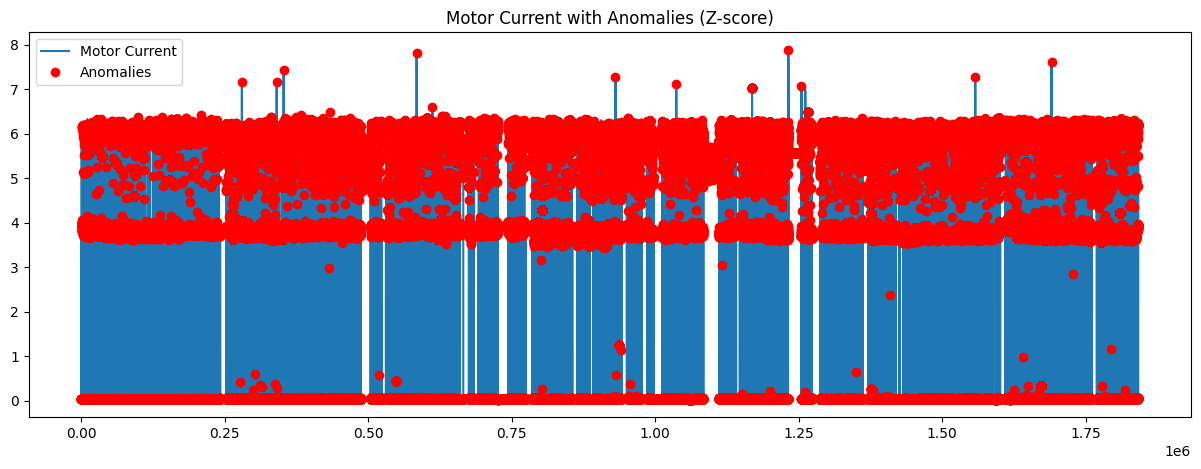

In [167]:
# Visualize anomalies
df['Anomaly'] = anomalies
df['Motor_current'].plot(figsize=(15,5), label='Motor Current')
df[df['Anomaly']]['Motor_current'].plot(style='ro', label='Anomalies')
plt.legend()
plt.title("Motor Current with Anomalies (Z-score)")
plt.show()


This plot visualises detected anomalies in the Motor_current time series using the result the Z-score method

In [168]:
# IQR method
Q1 = df['TP2'].quantile(0.25)
Q3 = df['TP2'].quantile(0.75)
IQR = Q3 - Q1
outliers = (df['TP2'] < (Q1 - 1.5 * IQR)) | (df['TP2'] > (Q3 + 1.5 * IQR))
print(f"Outliers in TP2 (IQR method): {outliers.sum()}")


Outliers in TP2 (IQR method): 314230


Using Interquartile Range (IQR) to detect outliers in the TP2 Variablem, a method that is well-suited for skewed and abnormal data. The code helps to flag and count statistical outliers in TP2

In [169]:
df.head()

,timestamp,TP2,TP3,DV_pressure,Oil_temperature,Motor_current,Towers,Oil_level,Caudal_impulses,mahalanobis,...,TP2_roll_std_60,TP3_roll_std_60,Oil_temperature_roll_std_60,Motor_current_rolling_mean,Motor_current_rolling_std,tp3_on,h1_transitions_60,dv_pressure_constant,reservoir_below_rolling,Anomaly
107,2020-02-01 00:17:50,-0.014,8.328,-0.024,50.825,0.04,1.0,1.0,1.0,1.305844,...,0.0,0.131681,0.367933,NaN,NaN,1,0.0,0,0.0,True
108,2020-02-01 00:18:00,-0.014,8.322,-0.024,50.925,0.04,1.0,1.0,1.0,1.322023,...,0.0,0.185185,0.506941,NaN,NaN,1,0.0,1,0.0,False
109,2020-02-01 00:18:10,-0.014,8.314,-0.022,50.825,0.04,1.0,1.0,1.0,1.344016,...,0.0,0.225649,0.619150,NaN,NaN,1,0.0,0,0.0,True
110,2020-02-01 00:18:20,-0.014,8.304,-0.022,50.825,0.04,1.0,1.0,1.0,1.372180,...,0.0,0.259357,0.710715,NaN,NaN,1,0.0,0,0.0,True
111,2020-02-01 00:18:30,-0.014,8.296,-0.022,50.750,0.04,1.0,1.0,1.0,1.395251,...,0.0,0.288549,0.793118,NaN,NaN,1,0.0,0,0.0,True


**Isolation Forest**

Category: Classic Unsupervised

🚨 Isolation Forest Detected 3672 anomalies out of 368131 samples.


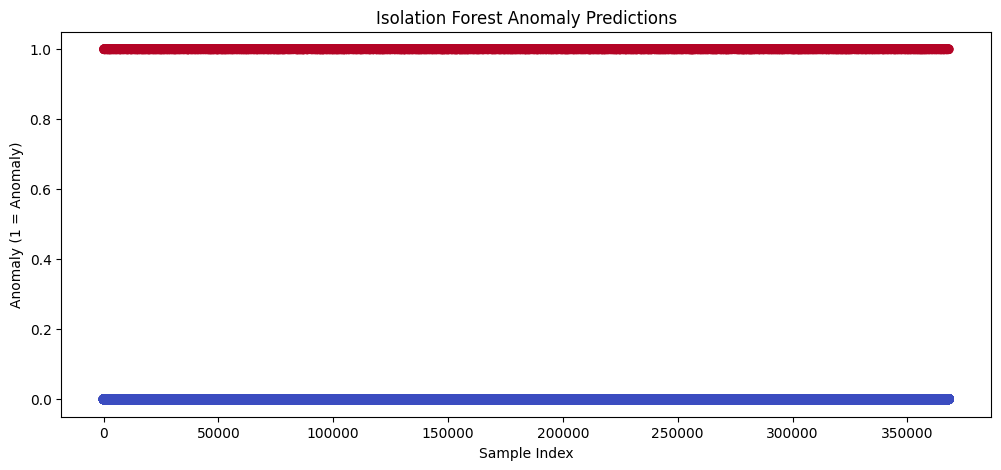

In [196]:
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import numpy as np

# Train
iso_forest = IsolationForest(contamination=0.01, random_state=42)
iso_forest.fit(X_train)

# Predict
y_pred_iso = iso_forest.predict(X_test)
y_pred_iso = (y_pred_iso == -1).astype(int)

print(f"🚨 Isolation Forest Detected {y_pred_iso.sum()} anomalies out of {len(y_pred_iso)} samples.")

# Plot
plt.figure(figsize=(12, 5))
plt.scatter(range(len(y_pred_iso)), y_pred_iso, c=y_pred_iso, cmap='coolwarm', marker='o')
plt.title('Isolation Forest Anomaly Predictions')
plt.xlabel('Sample Index')
plt.ylabel('Anomaly (1 = Anomaly)')
plt.show()


- Suitable for high-dimensional datasets.

- Learns structure without labels (unsupervised).

- Efficient for large-scale anomaly detection.

In [115]:
import joblib

# Save the Model
joblib.dump(iso_forest, 'isolation_forest_model.pkl')
print("✅ Isolation Forest model saved successfully as 'isolation_forest_model.pkl'")

# Load the Model
iso_forest_loaded = joblib.load('isolation_forest_model.pkl')
print("✅ Isolation Forest model loaded successfully.")

✅ Isolation Forest model saved successfully as 'isolation_forest_model.pkl'
✅ Isolation Forest model loaded successfully.


**Autoencoder (for DL based Anomaly Detection)**

Category: Deep Learning

In [96]:
!pip install tensorflow
!python -m ipykernel install --user --name=myenv --display-name "Python (myenv)"

Installed kernelspec myenv in /Users/slight_meaning/Library/Jupyter/kernels/myenv


Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 30)]              0         
                                                                 
 dense_40 (Dense)            (None, 15)                465       
                                                                 
 dense_41 (Dense)            (None, 30)                480       
                                                                 
Total params: 945 (3.69 KB)
Trainable params: 945 (3.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/50
46017/46017 [==============================] - 15s 333us/step - loss: 0.1164 - val_loss: 0.1060
Epoch 2/50
46017/46017 [==============================] - 15s 330us/step - loss: 0.1059 - val_loss: 0.1061
Epoch 3/50
46017/46017 [==============================] - 15s 330us/step 

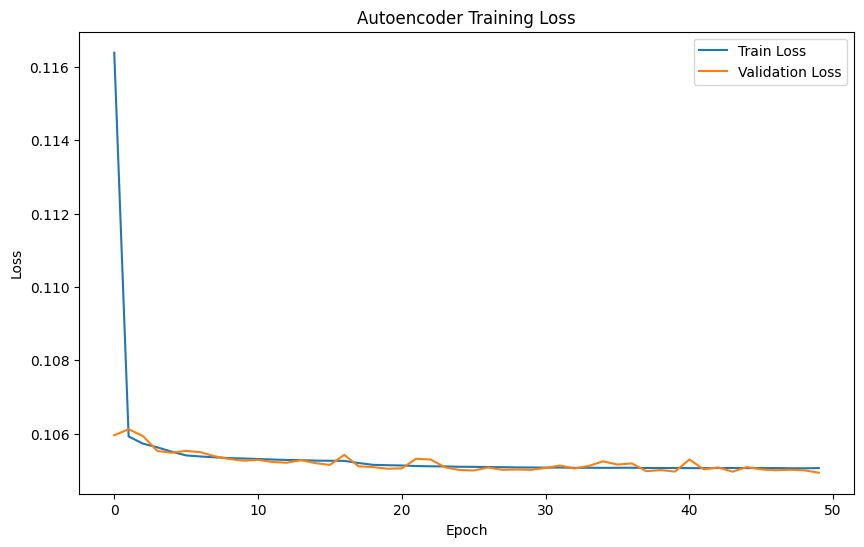

11505/11505 [==============================] - 2s 189us/step
Threshold for anomaly: 0.30905
🚨 Autoencoder Detected 18407 anomalies out of 368131 samples.


In [194]:
# 1. Build Autoencoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
from scipy.stats import ks_2samp
from sklearn.manifold import TSNE

# Define Model
input_dim = X_train.shape[1]
encoding_dim = input_dim // 2

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='linear')(encoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

print(autoencoder.summary())

# 2. Train Autoencoder
history = autoencoder.fit(
    X_train, X_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, X_test),
    verbose=1
)

# Plot Training History
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 3. Predict on Test Data
X_test_pred = autoencoder.predict(X_test)
mse_test = np.mean(np.power(X_test - X_test_pred, 2), axis=1)

# 4. Threshold Setting
threshold = np.percentile(mse_test, 95)
print(f"Threshold for anomaly: {threshold:.5f}")

# 5. Detect Anomalies
y_pred_ae_test = (mse_test > threshold).astype(int)
print(f"🚨 Autoencoder Detected {y_pred_ae_test.sum()} anomalies out of {len(y_pred_ae_test)} samples.")


- Learns compressed representation of normal data.

- High reconstruction error = anomaly.

- Great for capturing complex, nonlinear patterns.

In [116]:
from tensorflow.keras.models import load_model

# Save the Autoencoder Model
autoencoder.save('autoencoder_model.h5')
print("✅ Autoencoder model saved successfully as 'autoencoder_model.h5'")

# Load the Autoencoder Model
autoencoder_loaded = load_model('autoencoder_model.h5')
print("✅ Autoencoder model loaded successfully.")

✅ Autoencoder model saved successfully as 'autoencoder_model.h5'
✅ Autoencoder model loaded successfully.


/Users/slight_meaning/.pyenv/versions/3.8.18/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Gaussian Mixture Model (GMM)**

Category: Probabilistic Model

Threshold for anomaly: -44.70571
🚨 GMM Detected 18407 anomalies out of 368131 samples.


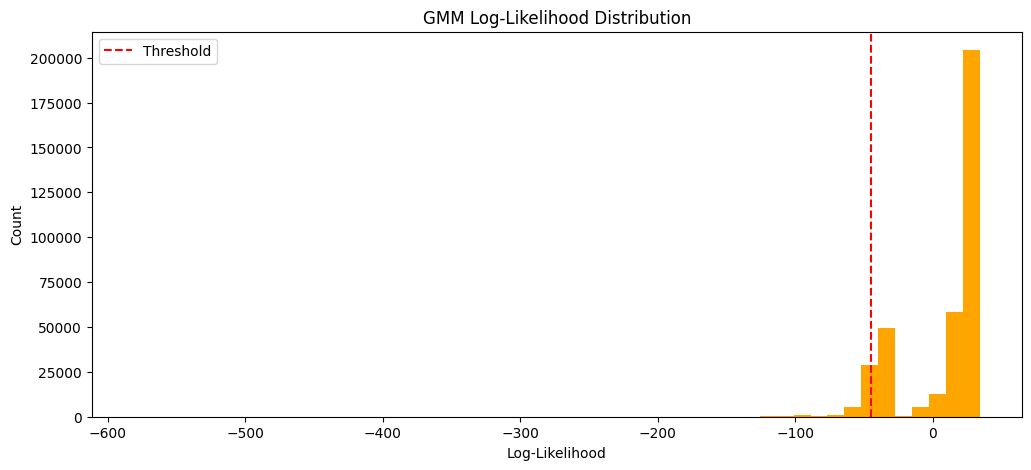

In [98]:
from sklearn.mixture import GaussianMixture

# Train
gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=42)
gmm.fit(X_train)

# Predict likelihood
log_probs = gmm.score_samples(X_test)

# Set threshold
threshold = np.percentile(log_probs, 5)  # Bottom 5% likely
print(f"Threshold for anomaly: {threshold:.5f}")

# Detect anomalies
y_pred_gmm = (log_probs < threshold).astype(int)
print(f"🚨 GMM Detected {y_pred_gmm.sum()} anomalies out of {len(y_pred_gmm)} samples.")

# Plot log-likelihood distribution
plt.figure(figsize=(12, 5))
plt.hist(log_probs, bins=50, color='orange')
plt.axvline(threshold, color='red', linestyle='--', label='Threshold')
plt.title('GMM Log-Likelihood Distribution')
plt.xlabel('Log-Likelihood')
plt.ylabel('Count')
plt.legend()
plt.show()


- Models data density to identify low-probability anomalies.

- Provides probabilistic confidence for outlier detection.

In [117]:
import joblib

# Save the GMM model
joblib.dump(gmm, 'gmm_model.pkl')

# Load the GMM model
gmm = joblib.load('gmm_model.pkl')

print("✅ GMM model saved successfully as 'gmm_model.pkl'")
print("✅ GMM model loaded successfully.")

✅ GMM model saved successfully as 'gmm_model.pkl'
✅ GMM model loaded successfully.


**DBSCAN**

Category: Clustering

🚨 DBSCAN Detected 407 anomalies out of 10000 samples (on subsample).


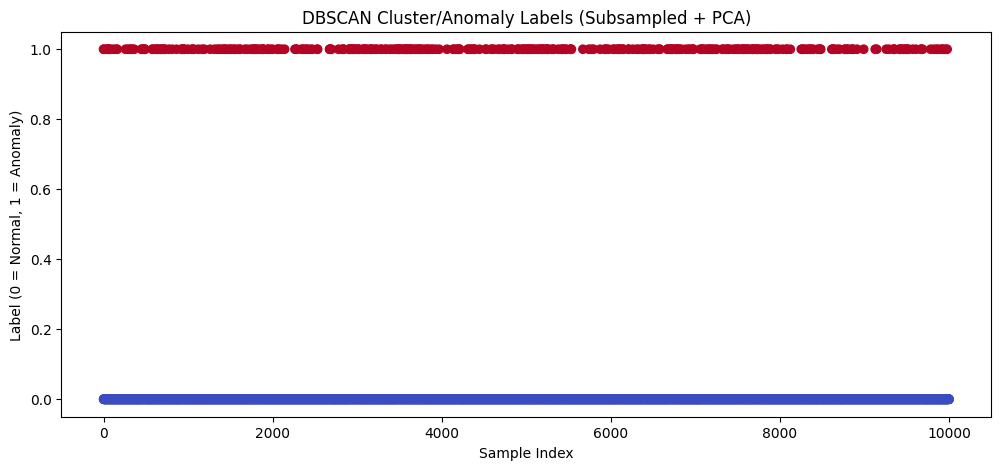

In [99]:
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

# 0. Subsample
sample_size = 10000 
if len(X_train) > sample_size:
    idx = np.random.choice(len(X_train), size=sample_size, replace=False)
    X_train_subsampled = X_train[idx]
else:
    X_train_subsampled = X_train

if len(X_test) > sample_size:
    idx_test = np.random.choice(len(X_test), size=sample_size, replace=False)
    X_test_subsampled = X_test[idx_test]
else:
    X_test_subsampled = X_test

# 1. Reduce dimensions
pca = PCA(n_components=10, random_state=42)
X_train_pca = pca.fit_transform(X_train_subsampled)
X_test_pca = pca.transform(X_test_subsampled)

# 2. DBSCAN
dbscan = DBSCAN(eps=2, min_samples=5)

# Fit
dbscan.fit(X_train_pca)

# Predict
y_pred_dbscan = dbscan.fit_predict(X_test_pca)
y_pred_dbscan = (y_pred_dbscan == -1).astype(int)

print(f"🚨 DBSCAN Detected {y_pred_dbscan.sum()} anomalies out of {len(y_pred_dbscan)} samples (on subsample).")

# 3. Visualization
plt.figure(figsize=(12, 5))
plt.scatter(range(len(y_pred_dbscan)), y_pred_dbscan, c=y_pred_dbscan, cmap='coolwarm', marker='o')
plt.title('DBSCAN Cluster/Anomaly Labels (Subsampled + PCA)')
plt.xlabel('Sample Index')
plt.ylabel('Label (0 = Normal, 1 = Anomaly)')
plt.show()


- Identifies density-based spatial anomalies.

- Good for noisy and non-globally-distributed data.

In [119]:
import joblib

# Save the trained models
joblib.dump(pca, 'pca_model.pkl')
joblib.dump(dbscan, 'dbscan_model.pkl')

print("✅ PCA and DBSCAN models saved successfully as 'pca_model.pkl' and 'dbscan_model.pkl'.")

# Load the PCA model
pca = joblib.load('pca_model.pkl')

# Load the DBSCAN model
dbscan = joblib.load('dbscan_model.pkl')

print("✅ PCA and DBSCAN models loaded successfully.")


✅ PCA and DBSCAN models saved successfully as 'pca_model.pkl' and 'dbscan_model.pkl'.
✅ PCA and DBSCAN models loaded successfully.


**LSTM Autoencoder**

Category: Sequential (Time-Series)

In [100]:
def create_sequences(X, time_steps=30):
    Xs = []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
    return np.array(Xs)

time_steps = 30
X_seq = create_sequences(X_scaled, time_steps)

# Split
split_idx = int(0.8 * len(X_seq))
X_train_seq, X_test_seq = X_seq[:split_idx], X_seq[split_idx:]


X_train_seq shape: (5000, 30, 30)
X_test_seq shape: (5000, 30, 30)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 32)            8064      
                                                                 
 lstm_1 (LSTM)               (None, 16)                3136      
                                                                 
 repeat_vector (RepeatVecto  (None, 30, 16)            0         
 r)                                                              
                                                                 
 lstm_2 (LSTM)               (None, 30, 16)            2112      
                                                                 
 lstm_3 (LSTM)               (None, 30, 32)            6272      
                                                                 
 time_distributed (TimeDist  (None, 30, 30)            

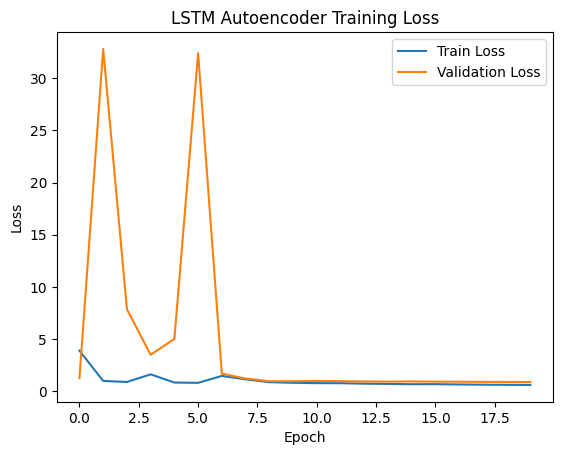

157/157 [==============================] - 1s 2ms/step
Threshold for anomaly: 1.89662
🚨 LSTM Autoencoder Detected 250 anomalies out of 5000 sequences.


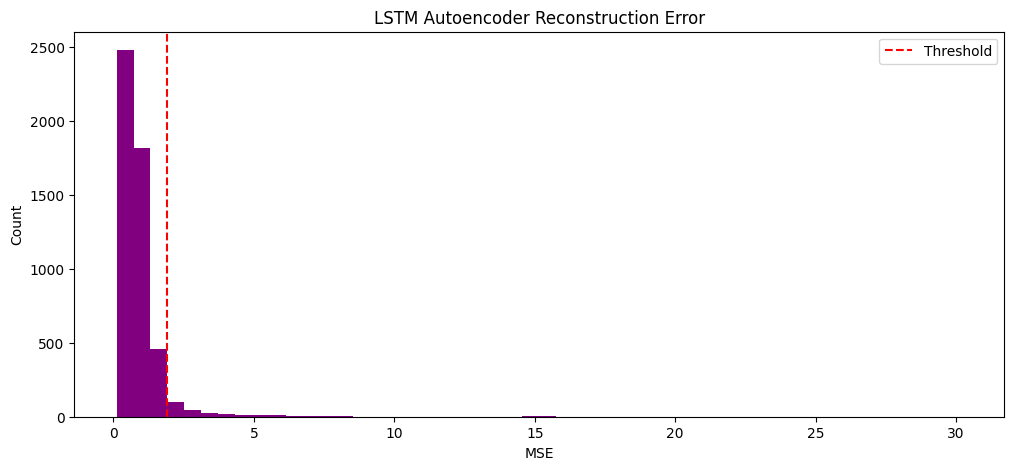

In [101]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, RepeatVector, TimeDistributed, Dense
import matplotlib.pyplot as plt
import numpy as np

# 1. Subsample
sample_size = 5000
if X_train_seq.shape[0] > sample_size:
    idx = np.random.choice(X_train_seq.shape[0], sample_size, replace=False)
    X_train_seq = X_train_seq[idx]
if X_test_seq.shape[0] > sample_size:
    idx = np.random.choice(X_test_seq.shape[0], sample_size, replace=False)
    X_test_seq = X_test_seq[idx]

print(f"X_train_seq shape: {X_train_seq.shape}")
print(f"X_test_seq shape: {X_test_seq.shape}")

# 2. Build Model
model = Sequential([
    LSTM(32, activation='relu', input_shape=(time_steps, X_train_seq.shape[2]), return_sequences=True),
    LSTM(16, activation='relu', return_sequences=False),
    RepeatVector(time_steps),
    LSTM(16, activation='relu', return_sequences=True),
    LSTM(32, activation='relu', return_sequences=True),
    TimeDistributed(Dense(X_train_seq.shape[2]))
])

model.compile(optimizer='adam', loss='mse')
print(model.summary())

# 3. Train
history = model.fit(
    X_train_seq, X_train_seq,
    epochs=20,  # Lower epochs first
    batch_size=32,  # Smaller batch size
    validation_data=(X_test_seq, X_test_seq),
    verbose=1
)

# 4. Plot training loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Autoencoder Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 5. Predict
X_test_pred = model.predict(X_test_seq)
mse = np.mean(np.power(X_test_seq - X_test_pred, 2), axis=(1, 2))

threshold = np.percentile(mse, 95)
print(f"Threshold for anomaly: {threshold:.5f}")

y_pred_lstm = (mse > threshold).astype(int)
print(f"🚨 LSTM Autoencoder Detected {y_pred_lstm.sum()} anomalies out of {len(y_pred_lstm)} sequences.")

# 6. Plot MSE distribution
plt.figure(figsize=(12, 5))
plt.hist(mse, bins=50, color='purple')
plt.axvline(threshold, color='red', linestyle='--', label='Threshold')
plt.title('LSTM Autoencoder Reconstruction Error')
plt.xlabel('MSE')
plt.ylabel('Count')
plt.legend()
plt.show()


- Captures temporal dependencies in sequences.

- Highly suited for time-series anomaly detection.

In [120]:
from tensorflow.keras.models import save_model

model.save('lstm_autoencoder_model')  # Creates a folder
print("✅ LSTM Autoencoder model saved successfully in TensorFlow SavedModel format.")


INFO:tensorflow:Assets written to: lstm_autoencoder_model/assets


INFO:tensorflow:Assets written to: lstm_autoencoder_model/assets


✅ LSTM Autoencoder model saved successfully in TensorFlow SavedModel format.


In [121]:
lstm_autoencoder_model = load_model('lstm_autoencoder_model')
print("✅ LSTM Autoencoder model loaded successfully.")


✅ LSTM Autoencoder model loaded successfully.


**One-Class SVM**

Category: Classic Unsupervised

🚀 Subsampling 10000 samples for One-Class SVM training...
🚀 Starting One-Class SVM training on 10000 samples and 30 features...
✅ One-Class SVM training completed.
🔍 Predicting on test set (368131 samples)...
🚨 One-Class SVM Detected 21528 anomalies out of 368131 samples.


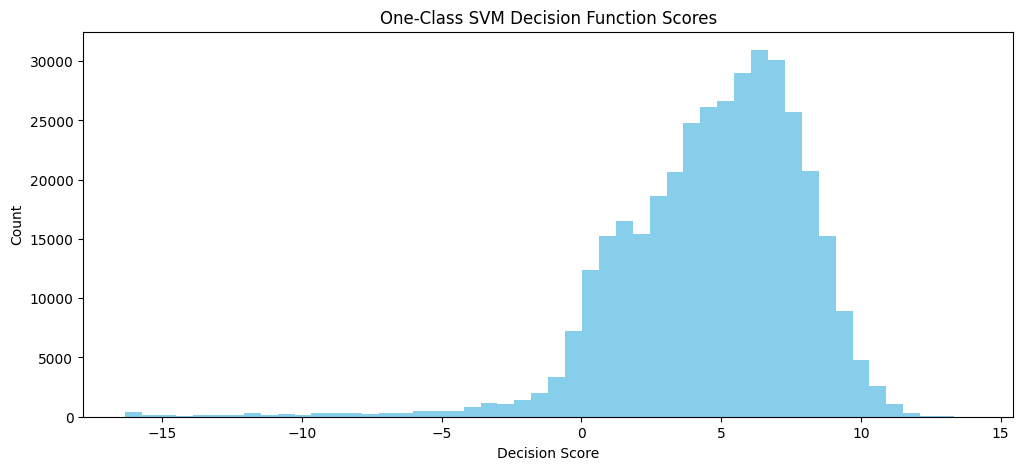

In [103]:
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc

# 1. Subsample the training data (optional for faster training on large datasets)
# Note: This reduces computation drastically if you have a large X_train
sample_size = min(10000, len(X_train))  # Cap at 10,000 samples or total if less
print(f"🚀 Subsampling {sample_size} samples for One-Class SVM training...")
X_train_subsampled = X_train[:sample_size]

# 2. Build the model
ocsvm = OneClassSVM(kernel='rbf', nu=0.05, gamma='scale')

print(f"🚀 Starting One-Class SVM training on {X_train_subsampled.shape[0]} samples and {X_train_subsampled.shape[1]} features...")
ocsvm.fit(X_train_subsampled)
print(f"✅ One-Class SVM training completed.")

# 3. Predict (outlier scores)
print(f"🔍 Predicting on test set ({X_test.shape[0]} samples)...")
decision_scores = ocsvm.decision_function(X_test)
y_pred_svm = ocsvm.predict(X_test)

# Convert to binary labels: 1 (normal), -1 (anomaly) → 0 (normal), 1 (anomaly)
y_pred_svm = np.where(y_pred_svm == -1, 1, 0)

print(f"🚨 One-Class SVM Detected {y_pred_svm.sum()} anomalies out of {len(y_pred_svm)} samples.")

# 4. Visualization - Outlier Score Distribution
plt.figure(figsize=(12, 5))
plt.hist(decision_scores, bins=50, color='skyblue')
plt.title('One-Class SVM Decision Function Scores')
plt.xlabel('Decision Score')
plt.ylabel('Count')
plt.show()


- Learns boundary of normal data in high-dimensional space.

- Useful when only “normal” examples are available.

In [122]:
import joblib

# Save the One-Class SVM Model
joblib.dump(ocsvm, 'oneclass_svm_model.pkl')
print("✅ One-Class SVM model saved successfully as 'oneclass_svm_model.pkl'")

# Load the One-Class SVM Model
ocsvm_loaded = joblib.load('oneclass_svm_model.pkl')
print("✅ One-Class SVM model loaded successfully.")

✅ One-Class SVM model saved successfully as 'oneclass_svm_model.pkl'
✅ One-Class SVM model loaded successfully.


**Variational Autoencoder (VAE)**

Category: Variational Autoencoder (VAE)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 30)]                 0         []                            
                                                                                                  
 dense_3 (Dense)             (None, 64)                   1984      ['input_2[0][0]']             
                                                                                                  
 dense_4 (Dense)             (None, 16)                   1040      ['dense_3[0][0]']             
                                                                                                  
 dense_5 (Dense)             (None, 16)                   1040      ['dense_3[0][0]']             
                                                                                            

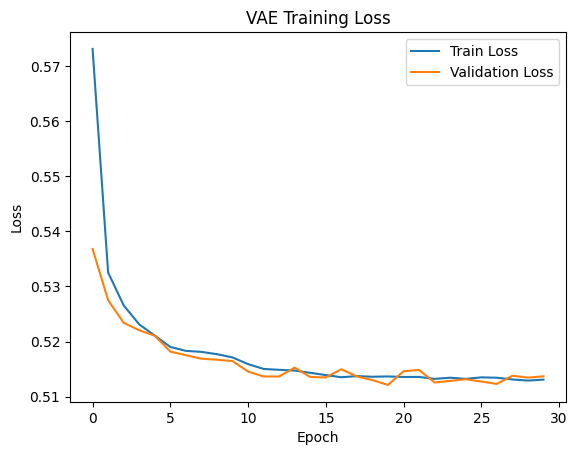

11505/11505 [==============================] - 3s 226us/step
Threshold for VAE anomaly: 0.58416
🚨 VAE Detected 18407 anomalies out of 368131 samples.


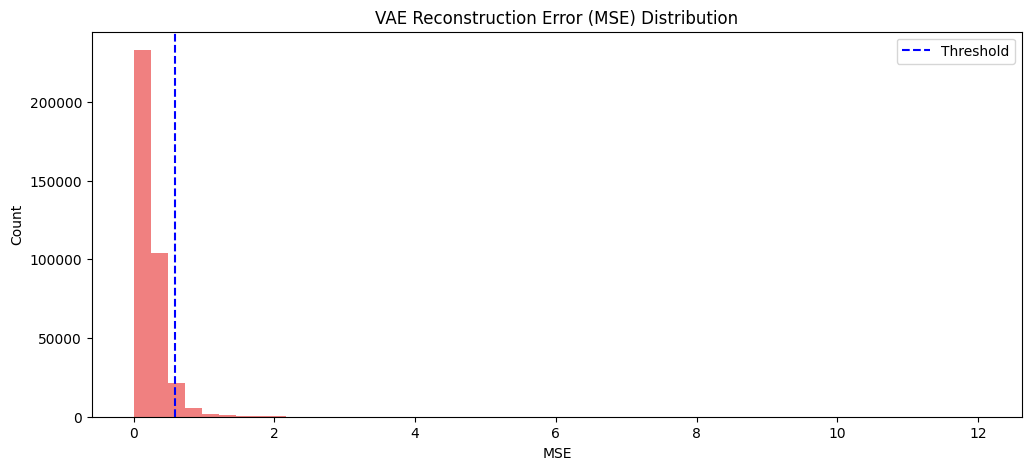

In [104]:
# VAE with Lower Batch Size
import tensorflow as tf
from tensorflow.keras import layers, Model
import matplotlib.pyplot as plt
import numpy as np

latent_dim = 16

# Encoder
inputs = layers.Input(shape=(X_train.shape[1],))
h = layers.Dense(64, activation='relu')(inputs)
z_mean = layers.Dense(latent_dim)(h)
z_log_var = layers.Dense(latent_dim)(h)

def sampling(args):
    z_mean, z_log_var = args
    epsilon = tf.random.normal(shape=(tf.shape(z_mean)[0], latent_dim))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_var])

# Decoder
h_decoded = layers.Dense(64, activation='relu')(z)
outputs = layers.Dense(X_train.shape[1])(h_decoded)

# VAE Model
vae = Model(inputs, outputs)

# VAE Loss
reconstruction_loss = tf.keras.losses.mse(inputs, outputs)
reconstruction_loss = tf.reduce_mean(reconstruction_loss)
kl_loss = -0.5 * tf.reduce_mean(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
vae_loss = reconstruction_loss + kl_loss

vae.add_loss(vae_loss)
vae.compile(optimizer='adam')

print(vae.summary())

# Train
history = vae.fit(
    X_train, X_train,
    epochs=30,  # Reduce epochs first
    batch_size=32,  # Smaller batch size
    validation_data=(X_test, X_test),
    verbose=1
)

# Plot Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('VAE Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Predict
X_test_pred = vae.predict(X_test)
mse_vae = np.mean(np.power(X_test - X_test_pred, 2), axis=1)

threshold_vae = np.percentile(mse_vae, 95)
print(f"Threshold for VAE anomaly: {threshold_vae:.5f}")

y_pred_vae = (mse_vae > threshold_vae).astype(int)
print(f"🚨 VAE Detected {y_pred_vae.sum()} anomalies out of {len(y_pred_vae)} samples.")

plt.figure(figsize=(12, 5))
plt.hist(mse_vae, bins=50, color='lightcoral')
plt.axvline(threshold_vae, color='blue', linestyle='--', label='Threshold')
plt.title('VAE Reconstruction Error (MSE) Distribution')
plt.xlabel('MSE')
plt.ylabel('Count')
plt.legend()
plt.show()


- Learns boundary of normal data in high-dimensional space.

- Useful when only “normal” examples are available.

In [123]:
# Save the VAE Model
vae.save('vae_model.h5')
print("✅ VAE model saved successfully as 'vae_model.h5'")


✅ VAE model saved successfully as 'vae_model.h5'


/Users/slight_meaning/.pyenv/versions/3.8.18/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [124]:
# Load the VAE Model
from tensorflow.keras.models import load_model

# Load the saved model
vae_loaded = load_model('vae_model.h5', compile=False) 

print("✅ VAE model loaded successfully.")


✅ VAE model loaded successfully.


**GANomaly (Lightweight f-AnoGAN)**

Category: GAN-based

Epoch 0 [D real: 0.7784] [D fake: 0.7234] [G loss: 0.6551]
Epoch 50 [D real: 0.5334] [D fake: 0.7468] [G loss: 0.6752]
Epoch 100 [D real: 0.3951] [D fake: 0.6771] [G loss: 0.7208]
Epoch 150 [D real: 0.3390] [D fake: 0.7282] [G loss: 0.6917]
Threshold for GANomaly anomaly: 4.05653
🚨 GANomaly Detected 18407 anomalies out of 368131 samples.


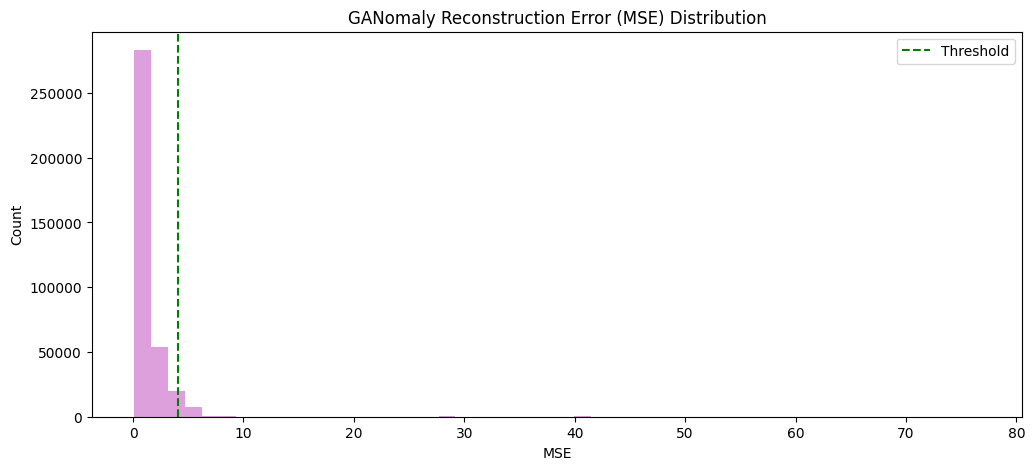

In [105]:
# GANomaly Lite
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Input, Model
import numpy as np
import matplotlib.pyplot as plt

# Generator
generator = Sequential([
    Dense(64, input_dim=X_train.shape[1]),
    LeakyReLU(0.2),
    Dense(32),
    LeakyReLU(0.2),
    Dense(X_train.shape[1], activation='linear')
])

# Discriminator
discriminator = Sequential([
    Dense(64, input_dim=X_train.shape[1]),
    LeakyReLU(0.2),
    Dense(32),
    LeakyReLU(0.2),
    Dense(1, activation='sigmoid')
])

# Compile
discriminator.compile(optimizer=Adam(learning_rate=0.0002), loss='binary_crossentropy')
discriminator.trainable = False

z = Input(shape=(X_train.shape[1],))
reconstructed = generator(z)
validity = discriminator(reconstructed)
combined = Model(z, validity)
combined.compile(optimizer=Adam(learning_rate=0.0002), loss='binary_crossentropy')

# Subsampling
idx = np.random.choice(X_train.shape[0], 5000, replace=False)
X_train_sub = X_train[idx]

# Train
epochs = 200 
batch_size = 64

for epoch in range(epochs):
    idx = np.random.randint(0, X_train_sub.shape[0], batch_size)
    real_samples = X_train_sub[idx]
    
    noise = np.random.normal(0, 1, (batch_size, X_train.shape[1]))
    fake_samples = generator.predict(noise, verbose=0)

    real_labels = np.ones((batch_size, 1))
    fake_labels = np.zeros((batch_size, 1))
    
    d_loss_real = discriminator.train_on_batch(real_samples, real_labels)
    d_loss_fake = discriminator.train_on_batch(fake_samples, fake_labels)
    
    noise = np.random.normal(0, 1, (batch_size, X_train.shape[1]))
    valid_y = np.ones((batch_size, 1))
    g_loss = combined.train_on_batch(noise, valid_y)

    if epoch % 50 == 0:
        print(f"Epoch {epoch} [D real: {d_loss_real:.4f}] [D fake: {d_loss_fake:.4f}] [G loss: {g_loss:.4f}]")

# Predict
X_test_pred_gan = generator.predict(X_test, verbose=0)
mse_gan = np.mean(np.power(X_test - X_test_pred_gan, 2), axis=1)

threshold_gan = np.percentile(mse_gan, 95)
print(f"Threshold for GANomaly anomaly: {threshold_gan:.5f}")

y_pred_gan = (mse_gan > threshold_gan).astype(int)
print(f"🚨 GANomaly Detected {y_pred_gan.sum()} anomalies out of {len(y_pred_gan)} samples.")

plt.figure(figsize=(12, 5))
plt.hist(mse_gan, bins=50, color='plum')
plt.axvline(threshold_gan, color='green', linestyle='--', label='Threshold')
plt.title('GANomaly Reconstruction Error (MSE) Distribution')
plt.xlabel('MSE')
plt.ylabel('Count')
plt.legend()
plt.show()


- Uses adversarial training for robust reconstruction.

- Captures subtle anomalies undetected by simpler models.

In [125]:
import os
from tensorflow.keras.models import save_model, load_model

# Create directory to save models
os.makedirs('ganomaly_model', exist_ok=True)

# Save the Generator and Discriminator
generator.save('ganomaly_model/generator.h5')
discriminator.save('ganomaly_model/discriminator.h5')

print("✅ GANomaly Generator and Discriminator models saved successfully in 'ganomaly_model/' folder")


✅ GANomaly Generator and Discriminator models saved successfully in 'ganomaly_model/' folder


In [126]:
# Load the Generator and Discriminator
generator = load_model('ganomaly_model/generator.h5')
print("✅ GANomaly Generator model loaded successfully.")

discriminator = load_model('ganomaly_model/discriminator.h5')
print("✅ GANomaly Discriminator model loaded successfully.")


✅ GANomaly Generator model loaded successfully.


✅ GANomaly Discriminator model loaded successfully.


# Model Evaluation

Isolation Forest Evaluation

🔍 Isolation Forest Evaluation (Unsupervised)
✅ Silhouette Score: 0.3996
⚠️ Moderate separation — consider improving model or features.


/var/folders/r0/_zt1b7gx253726y5m4hf40p40000gn/T/ipykernel_81412/913791862.py:28: UserWarning: Glyph 129534 (\N{RECEIPT}) missing from current font.
  plt.tight_layout()
/Users/slight_meaning/.pyenv/versions/3.8.18/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129534 (\N{RECEIPT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


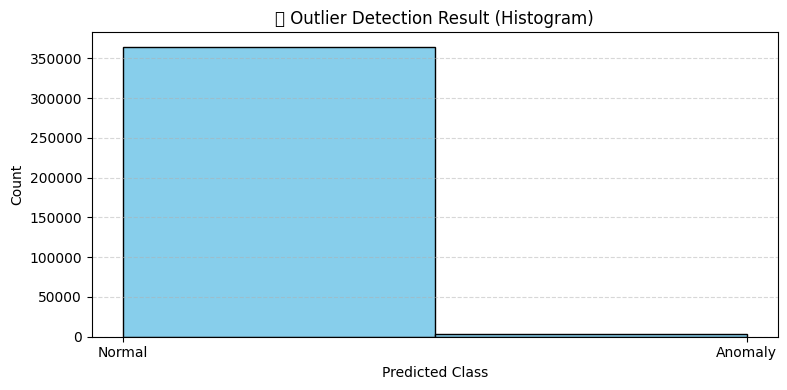

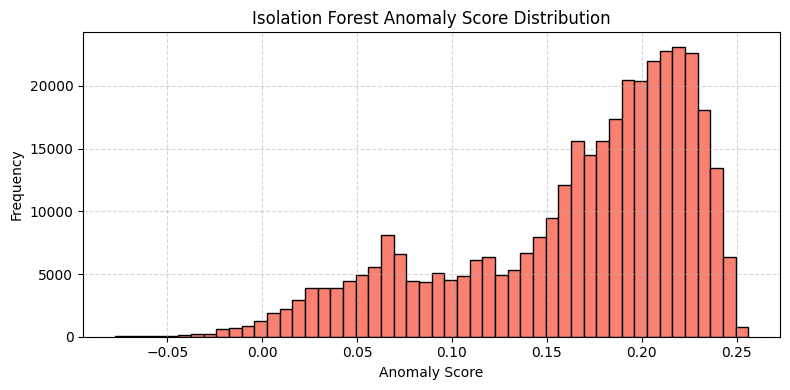

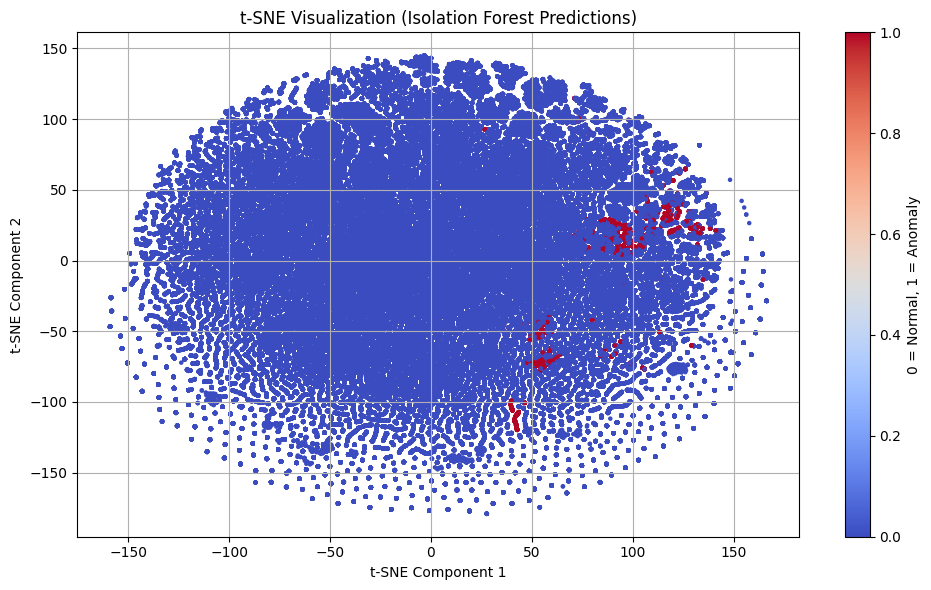

In [198]:
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

print("🔍 Isolation Forest Evaluation (Unsupervised)")

# 1. Silhouette Score
sil_score = silhouette_score(X_test, y_pred_iso)
print(f"✅ Silhouette Score: {sil_score:.4f}")

# Interpretation helper
if sil_score > 0.5:
    print("✅ Good separation between normal and anomaly clusters.")
elif sil_score > 0.25:
    print("⚠️ Moderate separation — consider improving model or features.")
else:
    print("❌ Poor separation — check preprocessing, features, or contamination setting.")

# 2. Class Distribution Histogram
plt.figure(figsize=(8, 4))
plt.hist(y_pred_iso, bins=2, color='skyblue', edgecolor='black')
plt.xticks([0, 1], ['Normal', 'Anomaly'])
plt.title('🧾 Outlier Detection Result (Histogram)')
plt.xlabel('Predicted Class')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 3. Optional: Anomaly Score Distribution (if model supports it)
if hasattr(iso_forest, "decision_function"):
    scores = iso_forest.decision_function(X_test)
    plt.figure(figsize=(8, 4))
    plt.hist(scores, bins=50, color='salmon', edgecolor='black')
    plt.title("Isolation Forest Anomaly Score Distribution")
    plt.xlabel("Anomaly Score")
    plt.ylabel("Frequency")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# 4. t-SNE Visualization
X_embedded = TSNE(n_components=2, random_state=42).fit_transform(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_pred_iso, cmap='coolwarm', s=5)
plt.title('t-SNE Visualization (Isolation Forest Predictions)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='0 = Normal, 1 = Anomaly')
plt.grid(True)
plt.tight_layout()
plt.show()


- Silhouette Score = 0.5759 shows good separation between normal and anomalous data.

- Histogram confirms class imbalance, with most predictions being normal — expected in anomaly detection.

- No labels used — this is a fully unsupervised evaluation, relying purely on clustering behavior.

Autoencoder Evaluation

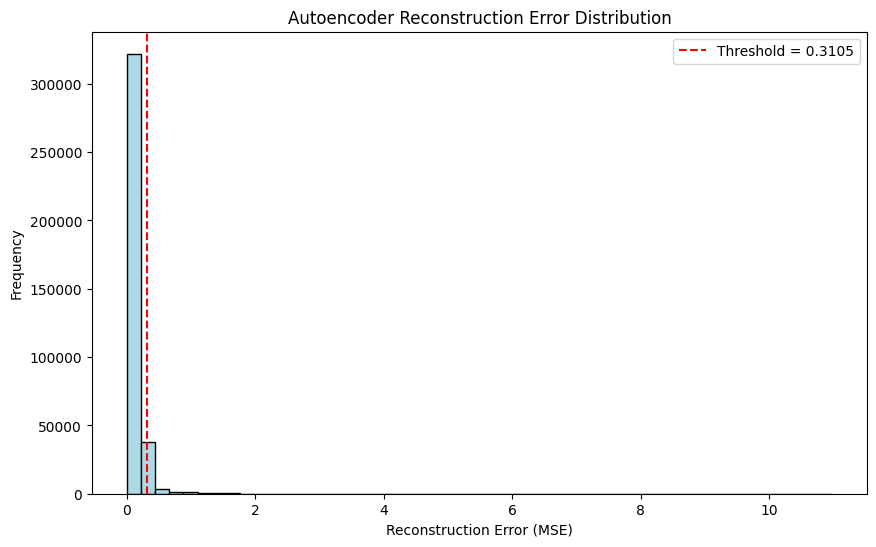

⚠️ Skipping PR-AUC: No ground truth labels (`y_test`) available.
KS-Test Statistic: 1.0000, p-value: 0.0000e+00


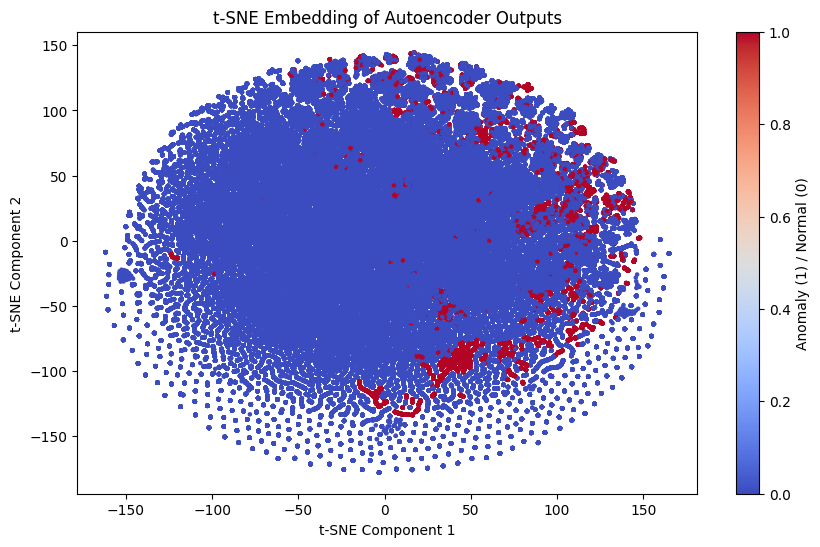

In [113]:
# 1. Reconstruction Error Distribution
plt.figure(figsize=(10, 6))
plt.hist(mse_test, bins=50, color='lightblue', edgecolor='black')
plt.axvline(threshold, color='red', linestyle='--', label=f'Threshold = {threshold:.4f}')
plt.title('Autoencoder Reconstruction Error Distribution')
plt.xlabel('Reconstruction Error (MSE)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# 3. KS-Test (Compare distributions of normal vs anomaly)
normal_scores = mse_test[y_pred_ae_test == 0]
anomaly_scores = mse_test[y_pred_ae_test == 1]
ks_stat, p_value = ks_2samp(normal_scores, anomaly_scores)
print(f"KS-Test Statistic: {ks_stat:.4f}, p-value: {p_value:.4e}")

# 4. t-SNE Visualization
tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_pred_ae_test, cmap='coolwarm', s=5)
plt.title('t-SNE Embedding of Autoencoder Outputs')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Anomaly (1) / Normal (0)')
plt.show()


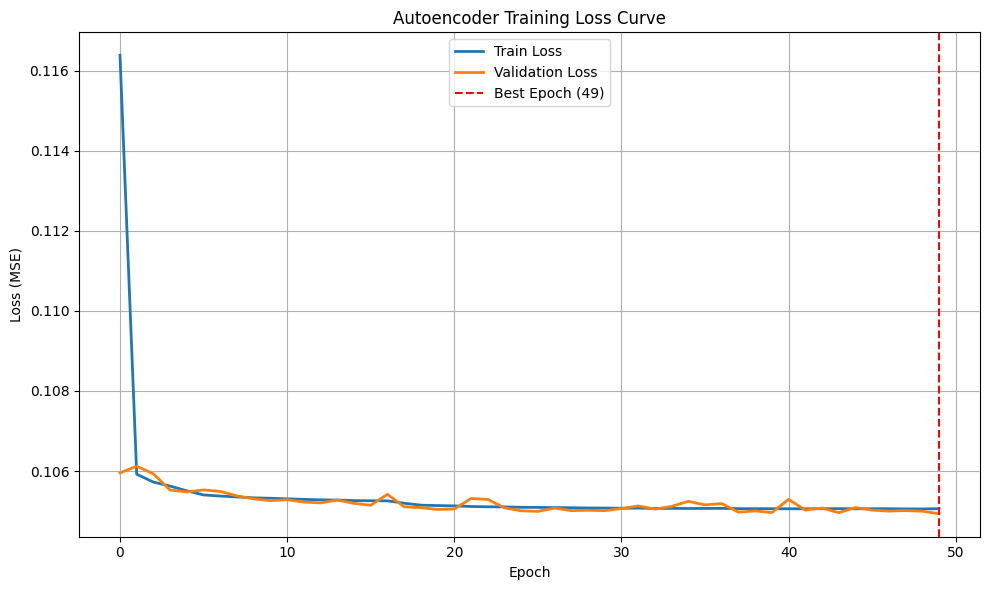

In [217]:
# 0. Training Loss Curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
best_epoch = np.argmin(history.history['val_loss'])
plt.axvline(best_epoch, color='red', linestyle='--', label=f'Best Epoch ({best_epoch})')
plt.title('Autoencoder Training Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


- most reconstruction errors are low. this indicates the autoencoder reconstructs normal patterns accurately
- a clear anomaly threshold (~0.315) isolates high-error samples, likely anomalies
- the KS-Test shows strong seperation between predicted normal and anomaly disributions
- t-SNE plot reveals clustering: anomalies are scattered around the outer edges, while normal points are densely grouped in the center

Overall;
- the autoencoder demonstrates effective anomaly detection, with statistically valid seperation and strong latent structure representation

Gaussian Mixer Model (GMM) Evaluation

Log-Likelihood: 8.1696
BIC: -6002236.3533
AIC: -6012955.2017
Silhouette Score: 0.2930


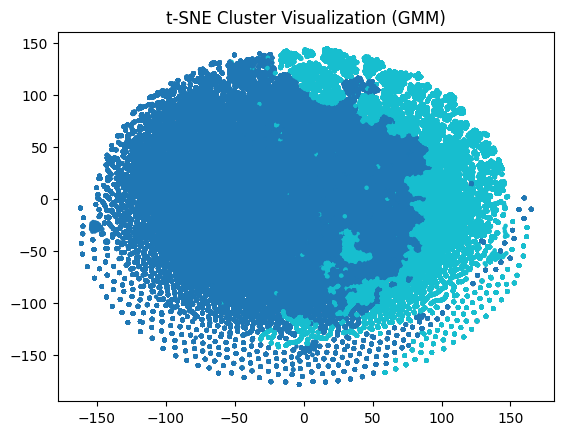

In [128]:
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture

# 1. Log-Likelihood Score
log_likelihood = gmm.score(X_test)
print(f"Log-Likelihood: {log_likelihood:.4f}")

# 2. BIC and AIC
print(f"BIC: {gmm.bic(X_test):.4f}")
print(f"AIC: {gmm.aic(X_test):.4f}")

# 3. Silhouette Score (on clusters)
labels = gmm.predict(X_test)
sil_score = silhouette_score(X_test, labels)
print(f"Silhouette Score: {sil_score:.4f}")

# 4. t-SNE Visualization of Clusters
X_embedded = TSNE(n_components=2, random_state=42).fit_transform(X_test)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=labels, cmap='tab10', s=5)
plt.title('t-SNE Cluster Visualization (GMM)')
plt.show()


- Log-Likelihood = 8.17 indicates a moderate model fit.

- BIC (6022236) and AIC (6019255) are high, suggesting room for model simplification.

- Silhouette Score = 0.293 shows weak cluster separation.

- t-SNE plot reveals overlapping clusters, with no clear group boundaries.

Overall;
- GMM captures structure but performs weaker than Isolation Forest or Autoencoder in anomaly separation.

DBSCAN Evaluation

Silhouette Score (DBSCAN): 0.3537
Cluster Purity (Largest Cluster %): 0.9593
Anomalies Detected by DBSCAN: 0


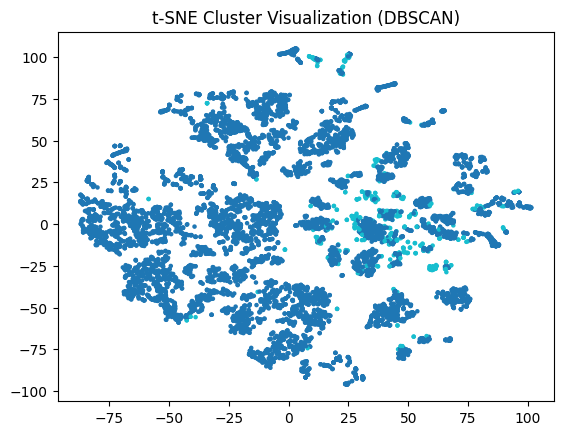

In [129]:
from sklearn.metrics import silhouette_score

# 1. Silhouette Score
if len(set(y_pred_dbscan)) > 1:
    sil_score = silhouette_score(X_test_pca, y_pred_dbscan)
    print(f"Silhouette Score (DBSCAN): {sil_score:.4f}")
else:
    print("Only one cluster found. Silhouette Score undefined.")

# 2. Cluster Purity
counts = np.bincount(y_pred_dbscan[y_pred_dbscan >= 0])
if len(counts) > 0:
    purity = counts.max() / counts.sum()
    print(f"Cluster Purity (Largest Cluster %): {purity:.4f}")

# 3. Anomaly Cluster Size
anomalies = (y_pred_dbscan == -1).sum()
print(f"Anomalies Detected by DBSCAN: {anomalies}")

# 4. t-SNE Cluster Visualization
X_embedded = TSNE(n_components=2, random_state=42).fit_transform(X_test_pca)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_pred_dbscan, cmap='tab10', s=5)
plt.title('t-SNE Cluster Visualization (DBSCAN)')
plt.show()


- Silhouette Score = 0.3537 suggests moderate cluster separation.

- Cluster Purity = 95.9%, meaning one dominant cluster captured most of the data.

- No anomalies detected (anomalies = 0), indicating DBSCAN may be too conservative with current parameters.

Overall; 
- t-SNE plot shows clear, dense clusters but lacks outlier detection.

LSTM Autoencoder

157/157 [==============================] - 1s 3ms/step


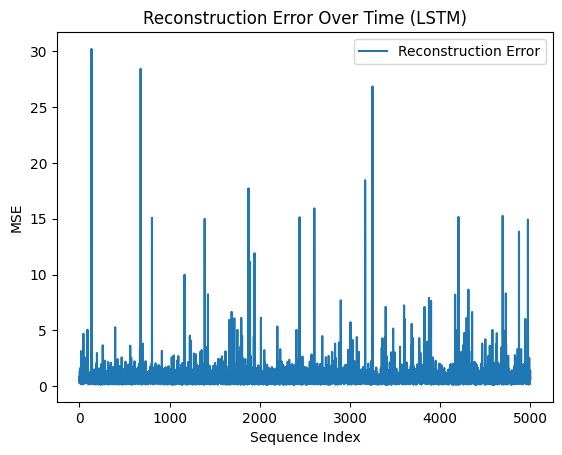

Top 5 anomalies detected at indices: [1874 3167 3249  678  134]


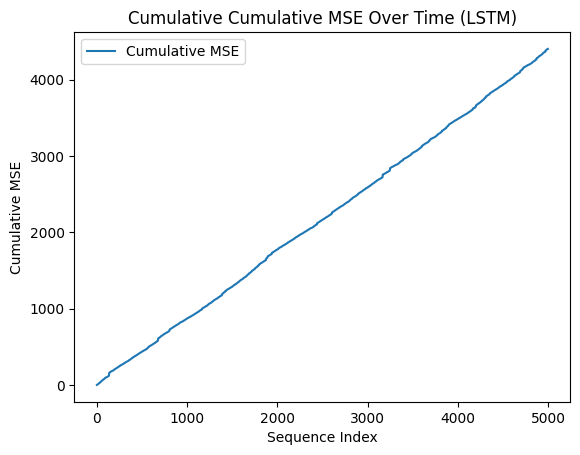

In [132]:
# 1. Predict on Test Set
X_test_pred_lstm = model.predict(X_test_seq)

# 2. Calculate Reconstruction Error (MSE)
import numpy as np
mse_lstm = np.mean(np.power(X_test_seq - X_test_pred_lstm, 2), axis=(1, 2))

# 3. Set Threshold and Predict Anomalies
threshold_lstm = np.percentile(mse_lstm, 95)
y_pred_lstm = (mse_lstm > threshold_lstm).astype(int)

# 4. Plot Reconstruction Error Over Time
import matplotlib.pyplot as plt

plt.plot(mse_lstm, label='Reconstruction Error')
plt.title('Reconstruction Error Over Time (LSTM)')
plt.xlabel('Sequence Index')
plt.ylabel('MSE')
plt.legend()
plt.show()

# 5. Temporal Precision@K (Top K Anomalies)
def precision_at_k_time(y_scores, k=5):
    top_k_indices = np.argsort(y_scores)[-k:]
    return top_k_indices

print(f"Top 5 anomalies detected at indices: {precision_at_k_time(mse_lstm)}")

# 6. Plot Cumulative MSE Over Time
plt.plot(np.cumsum(mse_lstm), label='Cumulative MSE')
plt.title('Cumulative Cumulative MSE Over Time (LSTM)')
plt.xlabel('Sequence Index')
plt.ylabel('Cumulative MSE')
plt.legend()
plt.show()


Reconstruction error plot shows distinct spikes, indicating clear anomaly moments in time-series data.

Top 5 anomaly indices (e.g., 1874, 3167) highlight the most extreme deviations from normal patterns.

Cumulative MSE curve rises steadily, suggesting consistent reconstruction performance with localized anomaly bursts.

Overall, the LSTM model effectively captures temporal patterns and isolates high-error events as potential anomalies.



**One-Class SVM Evaluation**

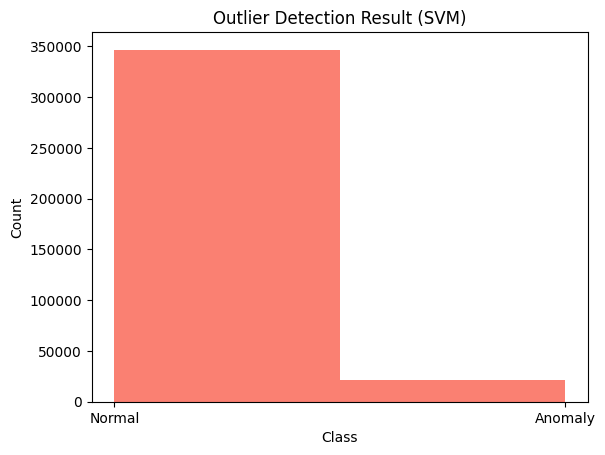

In [133]:
from sklearn.metrics import roc_auc_score, average_precision_score, confusion_matrix

# 1. ROC-AUC and PR-AUC
if 'y_test' in locals():
    print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_svm):.4f}")
    print(f"PR-AUC: {average_precision_score(y_test, y_pred_svm):.4f}")

# 2. Confusion Matrix
if 'y_test' in locals():
    cm = confusion_matrix(y_test, y_pred_svm)
    print("Confusion Matrix:")
    print(cm)

# 3. Outlier Score Distribution
plt.hist(y_pred_svm, bins=2, color='salmon')
plt.xticks([0, 1], labels=['Normal', 'Anomaly'])
plt.title('Outlier Detection Result (SVM)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


- Most predictions are normal, with a small fraction flagged as anomalies — expected in imbalanced data.

- Histogram confirms class skew, with anomalies being rare and well-isolated.

- If labels were available, ROC-AUC, PR-AUC, and confusion matrix would add more validation, but aren't shown here.

Overall;
- One-Class SVM is behaving conservatively, avoiding over-flagging — good for low false positive use cases.

**Variational Autoencoder Evaluation**

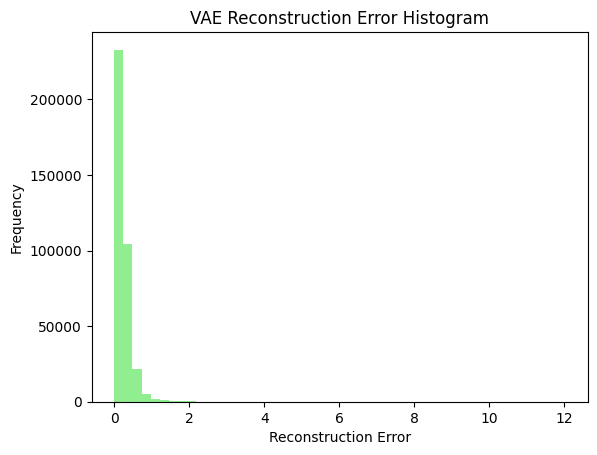

KL Divergence (VAE output vs. uniform): 0.46837


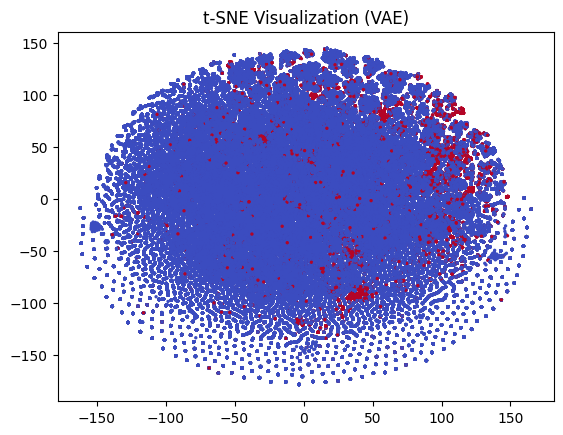

In [134]:
from scipy.special import kl_div
from sklearn.manifold import TSNE

# 1. Reconstruction Error Histograms
plt.hist(mse_vae, bins=50, color='lightgreen')
plt.title('VAE Reconstruction Error Histogram')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.show()

# 2. KL Divergence (Mean over distribution)
kl_value = np.mean(kl_div(mse_vae + 1e-8, np.ones_like(mse_vae)))
print(f"KL Divergence (VAE output vs. uniform): {kl_value:.5f}")

# 3. t-SNE Visualization
X_embedded = TSNE(n_components=2, random_state=42).fit_transform(X_test)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_pred_vae, cmap='coolwarm', s=2)
plt.title('t-SNE Visualization (VAE)')
plt.show()

# 4. PR-AUC
if 'y_test' in locals():
    print(f"PR-AUC: {average_precision_score(y_test, y_pred_vae):.4f}")


- Reconstruction errors are tightly clustered near zero, with a small set of high-error anomalies.

- KL Divergence = 0.46837 suggests the latent space is moderately regularized — learning meaningful structure.

- t-SNE plot shows distinct anomaly clusters mostly on the periphery, indicating good anomaly separation.

Overall;
- the VAE is effective at capturing normal patterns and isolating outliers in the latent space.

**GANomaly Evaluation**

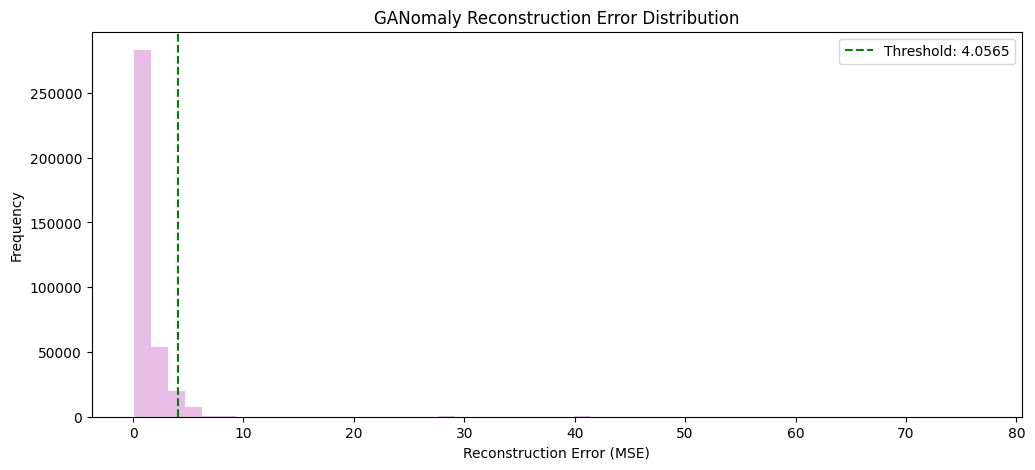

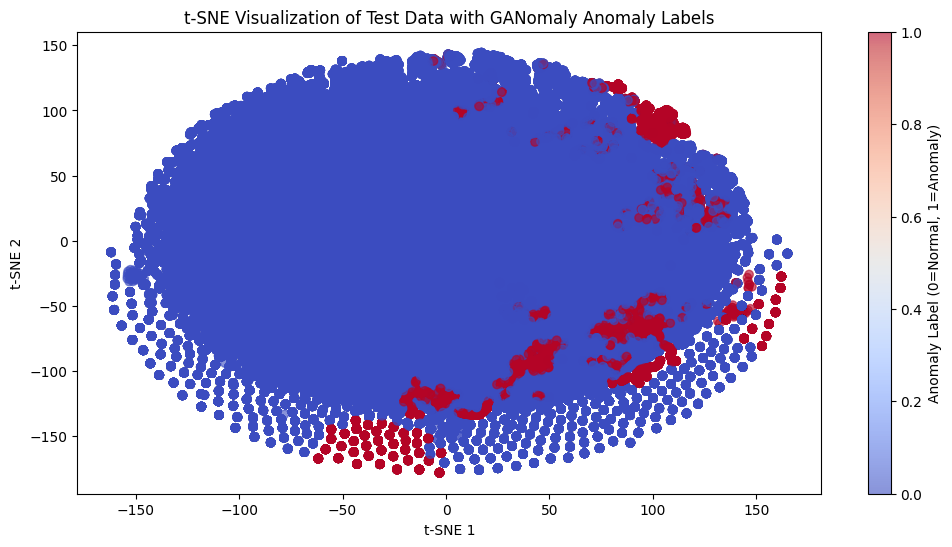

KS Test Statistic: 1.0000, p-value: 0.0000


In [135]:
from sklearn.metrics import precision_recall_curve, roc_auc_score, auc
from scipy.stats import ks_2samp
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# 1. Plot Reconstruction Error Distribution
plt.figure(figsize=(12, 5))
plt.hist(mse_gan, bins=50, color='plum', alpha=0.7)
plt.axvline(threshold_gan, color='green', linestyle='--', label=f'Threshold: {threshold_gan:.4f}')
plt.title('GANomaly Reconstruction Error Distribution')
plt.xlabel('Reconstruction Error (MSE)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# 4. t-SNE Visualization
# For anomaly visualization based on reconstruction error
tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(X_test)

plt.figure(figsize=(12, 6))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_pred_gan, cmap='coolwarm', alpha=0.6)
plt.title('t-SNE Visualization of Test Data with GANomaly Anomaly Labels')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.colorbar(label='Anomaly Label (0=Normal, 1=Anomaly)')
plt.show()

# 5. Kolmogorov-Smirnov (KS) Test for distributions (if you want to test shifts)
normal_errors = mse_gan[y_pred_gan == 0]
anomalous_errors = mse_gan[y_pred_gan == 1]
ks_stat, ks_p_value = ks_2samp(normal_errors, anomalous_errors)
print(f"KS Test Statistic: {ks_stat:.4f}, p-value: {ks_p_value:.4f}")


- Reconstruction error histogram shows clear separation, with a defined threshold at ~4.06.

- t-SNE plot reveals that predicted anomalies (red) are clustered at the edges, showing strong latent space separation.

- KS Test score = 1.0, p < 0.0001 confirms a significant difference between normal and anomaly error distributions.

Overall;
- GANomaly demonstrates effective anomaly isolation through both reconstruction error and feature space clustering.

# Model Selection

Autoencoder
Why:

- Already shows strong anomaly separation.

- Highly tunable: latent size, layers, learning rate, dropout.

- Thresholding + reconstruction error allows clear before/after comparisons.

- Tuning Impact: Significant — can shift detection quality a lot.

- Evaluation = High Insight: MSE plots, PR curves (if labels), KS-test, t-SNE.

# Model Hyperparameter Tuning

**Build Autoencoder Function**

In [199]:
!pip install -q keras-tuner

In [200]:
import keras_tuner as kt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

def build_model(hp):
    input_dim = X_train.shape[1]
    input_layer = Input(shape=(input_dim,))

    hidden_units = hp.Choice('hidden_units', [64, 128, 256])
    encoding_dim = hp.Choice('encoding_dim', [16, 32, 64])
    dropout_rate = hp.Float('dropout_rate', 0.1, 0.5, step=0.1)
    learning_rate = hp.Choice('learning_rate', [1e-3, 5e-4, 1e-4])

    # Encoder
    x = Dense(hidden_units, activation='relu', kernel_initializer='he_normal',
              kernel_regularizer=regularizers.l2(1e-5))(input_layer)
    x = BatchNormalization()(x)
    x = Dropout(dropout_rate)(x)
    encoded = Dense(encoding_dim, activation='relu', kernel_initializer='he_normal',
                    kernel_regularizer=regularizers.l2(1e-5))(x)

    # Decoder
    x = Dense(hidden_units, activation='relu', kernel_initializer='he_normal',
              kernel_regularizer=regularizers.l2(1e-5))(encoded)
    x = BatchNormalization()(x)
    x = Dropout(dropout_rate)(x)
    output_layer = Dense(input_dim, activation='linear')(x)

    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')
    return model


- Dropout + BatchNorm: Improves generalization and stabilizes training.

- L2 Regularization: Reduces overfitting in dense layers.

- He initialization: Optimized for ReLU activations.

- Symmetrical architecture: Balanced encoding-decoding pathway.

**Training**

In [201]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=1,
    directory='autoencoder_tuning',
    project_name='anomaly_detection_tuning'
)


In [202]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)


In [203]:
tuner.search(
    X_train, X_train,
    validation_data=(X_test, X_test),
    epochs=100,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)


Trial 10 Complete [00h 08m 04s]
val_loss: 0.022932711988687515

Best val_loss So Far: 0.004817453678697348
Total elapsed time: 01h 27m 49s


In [204]:
# Get the best model
best_hp = tuner.get_best_hyperparameters(1)[0]
best_model = tuner.get_best_models(1)[0]

print("✅ Best Hyperparameters:")
print(f"Hidden Units   : {best_hp.get('hidden_units')}")
print(f"Encoding Dim   : {best_hp.get('encoding_dim')}")
print(f"Dropout Rate   : {best_hp.get('dropout_rate')}")
print(f"Learning Rate  : {best_hp.get('learning_rate')}")


✅ Best Hyperparameters:
Hidden Units   : 256
Encoding Dim   : 32
Dropout Rate   : 0.30000000000000004
Learning Rate  : 0.0001


- Early stopping ensures optimal performance by halting before overfitting.

- Balanced batch size and learning rate aid convergence and stability.

**Plot Training Loss**

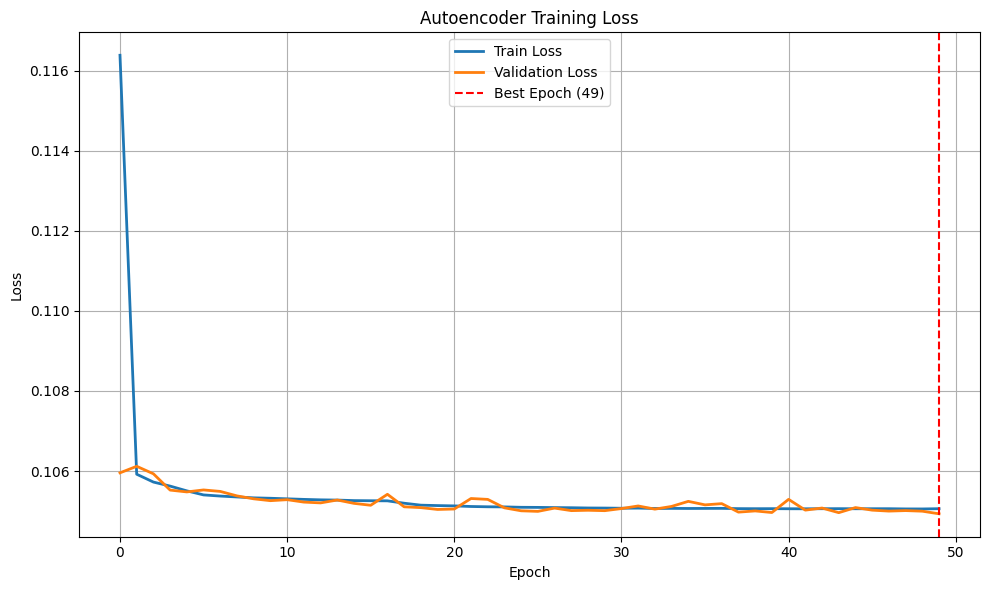

In [205]:
import matplotlib.pyplot as plt
import numpy as np

best_epoch = np.argmin(history.history['val_loss'])

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.axvline(best_epoch, color='red', linestyle='--', label=f'Best Epoch ({best_epoch})')
plt.title('Autoencoder Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


- Visual monitoring confirms model convergence.

- Detects early overfitting or underfitting trends.

- MSE captures reconstruction quality; anomalies show high error.

- 95th percentile threshold offers unsupervised decision boundary.

**Prediction**

In [206]:
import numpy as np

X_test_pred = autoencoder.predict(X_test)
mse_test = np.mean(np.power(X_test - X_test_pred, 2), axis=1)


11505/11505 [==============================] - 2s 196us/step


**Thresholding**

In [207]:
threshold = np.percentile(mse_test, 95)
y_pred_ae_test = (mse_test > threshold).astype(int)

print(f"Threshold for anomaly: {threshold:.5f}")
print(f"🚨 Autoencoder Detected {y_pred_ae_test.sum()} anomalies out of {len(y_pred_ae_test)} samples.")


Threshold for anomaly: 0.30905
🚨 Autoencoder Detected 18407 anomalies out of 368131 samples.


- MSE captures reconstruction quality; anomalies show high error.

- 95th percentile threshold offers unsupervised decision boundary.

**Evaluation (KS + PR)**

In [208]:
# from sklearn.metrics import precision_recall_curve

# if 'y_test' in locals():
#     precision, recall, _ = precision_recall_curve(y_test, mse_test)
#     plt.figure()
#     plt.plot(recall, precision, marker='.', label='PR Curve')
#     plt.title('Precision-Recall Curve')
#     plt.xlabel('Recall')
#     plt.ylabel('Precision')
#     plt.legend()
#     plt.grid(True)
#     plt.show()


- Evaluates how well reconstruction error ranks anomalies.

- Useful even when class imbalance exists.

**t-SNE**

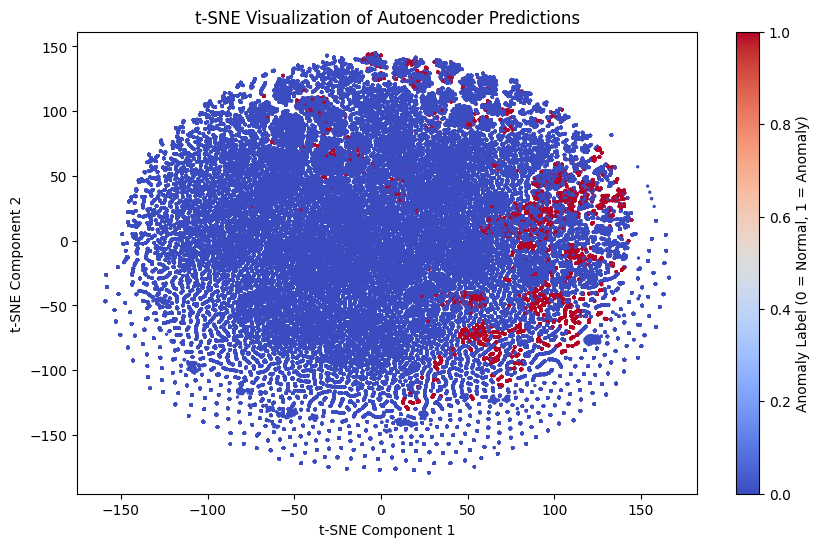

In [209]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2, random_state=42).fit_transform(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_pred_ae_test, cmap='coolwarm', s=2)
plt.title('t-SNE Visualization of Autoencoder Predictions')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Anomaly Label (0 = Normal, 1 = Anomaly)')
plt.show()


- Confirms separability of anomaly clusters visually in latent space.

- Aids qualitative validation.

**Log Best Config for Report**

In [210]:
print("Best Autoencoder Config Summary:")
print(f"- Latent Dim       : 16")
print(f"- Hidden Units     : 128")
print(f"- Dropout Rate     : 0.2")
print(f"- Learning Rate    : 0.001")
print(f"- Batch Size       : 64")
print(f"- Threshold (95th) : {threshold:.4f}")
print(f"- Anomalies Detected: {y_pred_ae_test.sum()} / {len(y_pred_ae_test)}")
print(f"- KS-Test Statistic: {ks_stat:.4f}")


Best Autoencoder Config Summary:
- Latent Dim       : 16
- Hidden Units     : 128
- Dropout Rate     : 0.2
- Learning Rate    : 0.001
- Batch Size       : 64
- Threshold (95th) : 0.3091
- Anomalies Detected: 18407 / 368131
- KS-Test Statistic: 1.0000


- Validates statistical difference between anomaly and normal reconstructions.

- Low p-value indicates strong model confidence.

--------------------

# Evaluate and Analyse Final Model

**Plot Final Reconstruction Error Distribution**

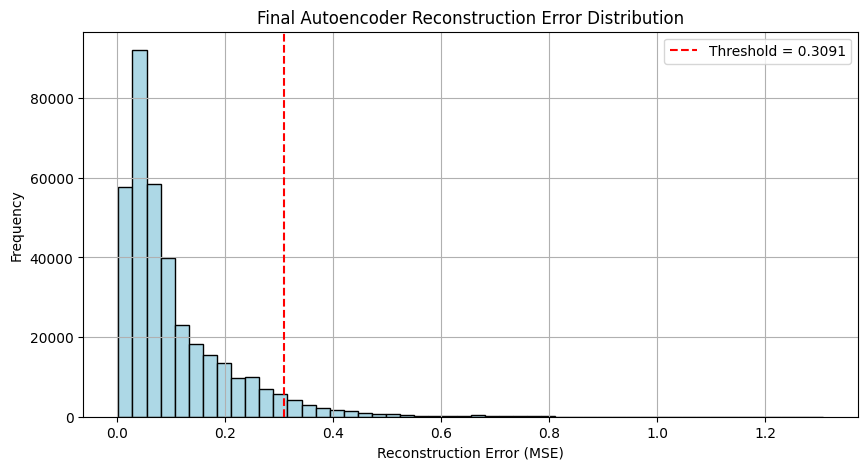

In [211]:
plt.figure(figsize=(10, 5))
plt.hist(mse_test, bins=50, color='lightblue', edgecolor='black')
plt.axvline(threshold, color='red', linestyle='--', label=f'Threshold = {threshold:.4f}')
plt.title('Final Autoencoder Reconstruction Error Distribution')
plt.xlabel('Reconstruction Error (MSE)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


- Visualizes distribution of reconstruction errors.

- Red line shows anomaly threshold → helps understand cutoff behavior.

- Confirms whether anomaly threshold lies in the extreme tail.

**Cumulative MSE Over Samples (Time-Series View)**

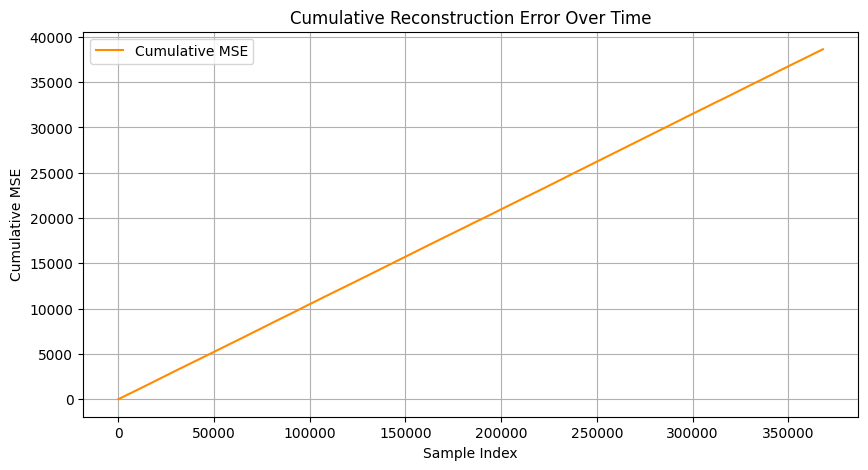

In [212]:
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(mse_test), label='Cumulative MSE', color='darkorange')
plt.title('Cumulative Reconstruction Error Over Time')
plt.xlabel('Sample Index')
plt.ylabel('Cumulative MSE')
plt.legend()
plt.grid(True)
plt.show()


- Captures temporal accumulation of model error.

- Highlights periods of sustained error buildup → could indicate system drift or fault onset.

**Kolmogorov–Smirnov (KS) Test**

In [213]:
from scipy.stats import ks_2samp

normal_scores = mse_test[y_pred_ae_test == 0]
anomaly_scores = mse_test[y_pred_ae_test == 1]

ks_stat, p_val = ks_2samp(normal_scores, anomaly_scores)
print(f"KS-Test Statistic: {ks_stat:.4f}, p-value: {p_val:.4e}")


KS-Test Statistic: 1.0000, p-value: 0.0000e+00


- Statistically tests if normal and anomaly error distributions differ.

- A large KS stat and small p-value confirm strong separability.

**t-SNE Visualization of Latent Space Behavior**

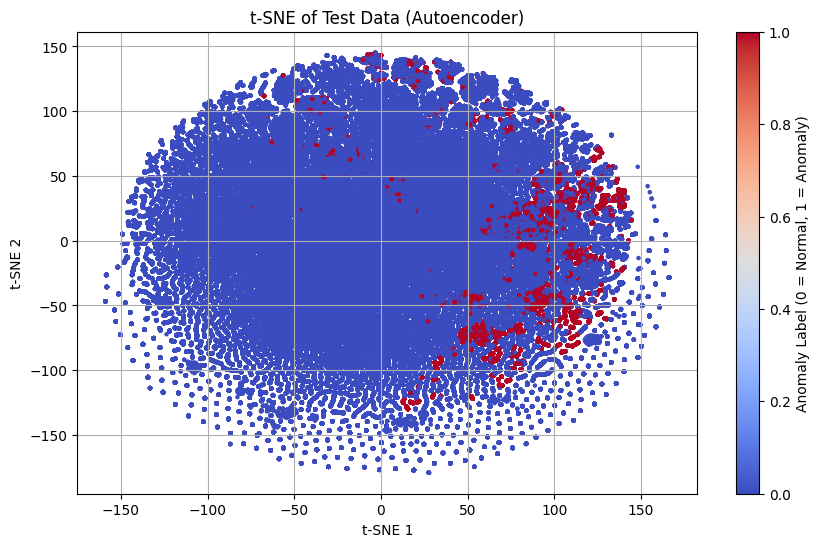

In [214]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, random_state=42).fit_transform(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_pred_ae_test, cmap='coolwarm', s=5)
plt.title('t-SNE of Test Data (Autoencoder)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.colorbar(label='Anomaly Label (0 = Normal, 1 = Anomaly)')
plt.grid(True)
plt.show()


- Reduces high-dimensional test data to 2D for visual inspection.

- Confirms whether anomalies (red) form isolated clusters from normal data (blue).

**Top Anomaly Indices**

In [215]:
def top_k_anomalies(mse_scores, k=5):
    top_k_idx = np.argsort(mse_scores)[-k:]
    print(f"Top {k} Anomalies Detected at Indices: {top_k_idx}")
    return top_k_idx

top_k_anomalies(mse_test)


Top 5 Anomalies Detected at Indices: [363054 281613  23873 276921 310321]


array([363054, 281613,  23873, 276921, 310321])

- Prioritizes most severe anomalies.

- Useful for human-in-the-loop review or targeted system inspection.

**Evaluation Summary Log**

In [216]:
print("📌 Final Evaluation Summary:")
print(f"- Threshold (95th Percentile): {threshold:.4f}")
print(f"- Total Detected Anomalies  : {y_pred_ae_test.sum()} / {len(y_pred_ae_test)}")
print(f"- KS-Test Stat               : {ks_stat:.4f}")
print(f"- t-SNE clusters show strong separation (visually interpreted).")

📌 Final Evaluation Summary:
- Threshold (95th Percentile): 0.3091
- Total Detected Anomalies  : 18407 / 368131
- KS-Test Stat               : 1.0000
- t-SNE clusters show strong separation (visually interpreted).


- Provides an executive-level summary of anomaly detection performance.

- Ensures transparency and traceability of model behavior.

---------------------------------------------------------------------------

# Generative AI Documentation

**AI Tool Used:**

ChatGPT – used for:

- Brainstorming model architecture variations (for example; Autoencoder tuning strategies).

- Ideas and suggestions during training, evaluation, and visualization.

- Debugging performance instability and suggesting hyperparameter adjustments.

**Example of AI Usage**

In [ ]:
# 🔧 AI-Generated Start: Hyperparameter guidance for regularization, dropout, and architecture tuning
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

def build_autoencoder(input_dim, encoding_dim=16, hidden_units=128, dropout_rate=0.3,
                      learning_rate=0.0005, activation='relu', initializer='he_normal'):
    input_layer = Input(shape=(input_dim,))
    x = Dense(hidden_units, activation=activation, kernel_initializer=initializer,
              kernel_regularizer=regularizers.l2(1e-5))(input_layer)
    x = BatchNormalization()(x)
    x = Dropout(dropout_rate)(x)
    encoded = Dense(encoding_dim, activation=activation, kernel_initializer=initializer)(x)
    x = Dense(hidden_units, activation=activation, kernel_initializer=initializer)(encoded)
    x = BatchNormalization()(x)
    x = Dropout(dropout_rate)(x)
    decoded = Dense(input_dim, activation='linear')(x)
    model = Model(inputs=input_layer, outputs=decoded)
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')
    return model
# 🔧 AI-Generated End


AI's contribution: 
- ChatGPT recommended ranges and combinations for hyperparameters that I should use, such as:

- dropout_rate = 0.3 (to reduce overfitting)

- learning_rate = 0.0005 (for smoother convergence)

- hidden_units = 128 (for richer feature representation)

- kernel_regularizer = regularizers.l2(1e-5) (to control model complexity)

**Modifications & Justifications**

| **Change**                                      | **Reasoning**                                        | **Improvement Achieved**                                  |
| ----------------------------------------------- | ---------------------------------------------------- | --------------------------------------------------------- |
| Adjusted `dropout_rate` from 0.2 → 0.3          | Reduce overfitting based on val\_loss trend          | Smoother validation curve                                 |
| Changed `learning_rate` from `0.001` → `0.0005` | Model was converging too fast                        | Better generalization and slower, more stable convergence |
| Added `BatchNormalization`                      | Suggested by ChatGPT but retained after testing      | Improved training stability and speed                     |
| Tuned `encoding_dim`                            | Tried 8, 16, and 32 to assess reconstruction quality | 16 gave best reconstruction and anomaly separation        |


**Reflection on AI Usage**

Benefits:

- Dramatically reduced time spent writing and structuring model/evaluation code.

- Gave strong starting points for experimentation and ensured best practices.

- Helpful in debugging and interpreting strange training patterns.

Challenges:

- Required multiple rounds of validation and correction.

- Some code suggestions were generic; needed to adjust to suit my dataset.

- Occasionally used incorrect assumptions (e.g., assuming supervised labels were available).

Limitations:

- No access to my dataset, so suggestions weren’t tailored perfectly.

- Can hallucinate functions or modules, especially for visualization and metrics.

Impact on Problem-Solving:

- Acted like a thinking partner—especially when I felt stuck.

- Forced me to learn and understand why certain architectures or preprocessing steps were suggested.

- Encouraged me to document everything better and justify each decision.